In [181]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
import os
import matplotlib.colors as mcolors
import pickle
from PIL import Image

from ipynb.fs.full.functions_for_creating_plots import *
os.chdir(os.getcwd())

In [182]:
## Dictionary holding the numbers of the molecules in the model (for explanation, look up model-figure.pdf)
molecules_dict={'$\mathbf{G_{GTP}}$':[23,33],
                '$\mathbf{IP_{3}}$':[40],
                'Total Arrestin-Receptor':[10,11,12,13,14,15],
                'PM Arrestin-Receptor':[10,11,12],
                'IC Arrestin-Receptor':[13,14,15]}

## Determine ligand concentrations              
ligand_ccs=(10 ** np.arange(-6, 1.1, 1))
internalisation_status=['With_internalisation','No_internalisation']

## Simulation time
simulation_time=1200


## High Koff: create figure with both high Koff==0.03 and Koff==0.3
high_koff=0.3

## Create layout for subplot_mosaic function
subplot_layout=[['.','B','C','D'],
                ['E_up','F_up','G_up','H_up'],
                ['E_low','F_low','G_low','H_low'],
                ['I','J','K','K']]#,
                #['L','L','L','L'],
                #['M','M','M','M']]




### Add plots for the first row (subplots **B - D**)
#### To be able to add additional subplots to the subplots_mosaic object later, plt.show() mustn't run plt.show() function and close the figure.
#### -> To prevent this plt.ioff() is run, but somehow it only takes effect after running this cell at least 2 times
## !!!! If running this script from scratch, run this cell 2 times, so subplots_mosaic object can be updated later with additional subplots!!!!!


In [183]:
def draw_kinetic_concentration_curve_of_molecule_with_different_ligand_ccs(molecule,molecules_dict,kon,koff,intern_status,process_name,ligand_ccs,\
                                                                           color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                                                           subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                                                           subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                                                           legend_title,subplot_legend_title_fontsize_nominator,subplot_label,\
                                                                           subplot_label_fontsize_nominator):
    ## Create directory path to load the data from
    dirname=os.path.join('../data/',intern_status,process_name,'')

    ## Adjust ligand concentrations to used Kon and Koff values +  convert it from uM/L to M/L (by subtracting 6 from hte logarithmic values of ligand ccs)
    ligands=np.log10(adjust_ligand_ccs(ligand_ccs,koff,kon)) - 6

    ## Define which subplot we eant to plot into from the original subplot_mosaic object
    axis=ax[subplot_name]

    ## Get color palette 
    colors = [color_palette_dict.get(col) for col in color_names]

    # Extract the maximum value of receptor-arrestin concentrations, in order to determine the common Y-axis range for the plots E-H
    arrestin_receptor_max_response=0
    
    ## Loop over the ligand concentrations, load the respective simulation data from the .csv file with only columns that contain data 
    #  for the molecule to be plotted
    for ligand,color in zip(ligands,colors):
        fname=dirname+ '_'.join([process_name,'koff',str(koff),'kon',str(kon),'ligand_cc',str(ligand)]) + '.csv'
        col_nums=[int(x+1) for x in molecules_dict[molecule]]
        col_nums.append(0)
        mol_ccs_df=pd.read_csv(fname, index_col=0,usecols=col_nums)
        plot=axis.plot(mol_ccs_df.index.tolist(),np.sum(mol_ccs_df.loc[:,:],1),label=ligand,color=color)
        ## Extract the maximum value of Arrestin-Receptor curves 
        if molecule=='Total Arrestin-Receptor' and max(np.sum(mol_ccs_df.loc[:,:],1))>arrestin_receptor_max_response:
            arrestin_receptor_max_response=max(np.sum(mol_ccs_df.loc[:,:],1))

    
    ## Customize legend, plot title, axis labels 
    plot_area=fig_width*fig_height

    axis.legend(title=legend_title,title_fontsize=plot_area/subplot_legend_title_fontsize_nominator,\
                fontsize=plot_area/subplot_legend_label_fontsize_nominator)
    
    axis_label_fontsize=plot_area/subplot_axis_label_fontsize_nominator
    axis_tick_labelsize=plot_area/subplot_axis_tick_label_fontsize_nominator

    title="$\mathbf{Low\ K_{off}}$"
    title_fontsize=plot_area/subplot_title_fontsize_nominator
    axis.set_title(title,fontsize=title_fontsize)

    axis.set_xlabel('Time (s)',fontweight="bold",fontsize=axis_label_fontsize)
    axis.set_ylabel(molecule,fontweight="bold",fontsize=axis_label_fontsize)
    axis.tick_params(axis='both', labelsize=axis_tick_labelsize)

    axis.text(-0.1, 1.05,subplot_label.lower(),weight='bold',size=plot_area/subplot_label_fontsize_nominator,transform=axis.transAxes)
    return plot,arrestin_receptor_max_response

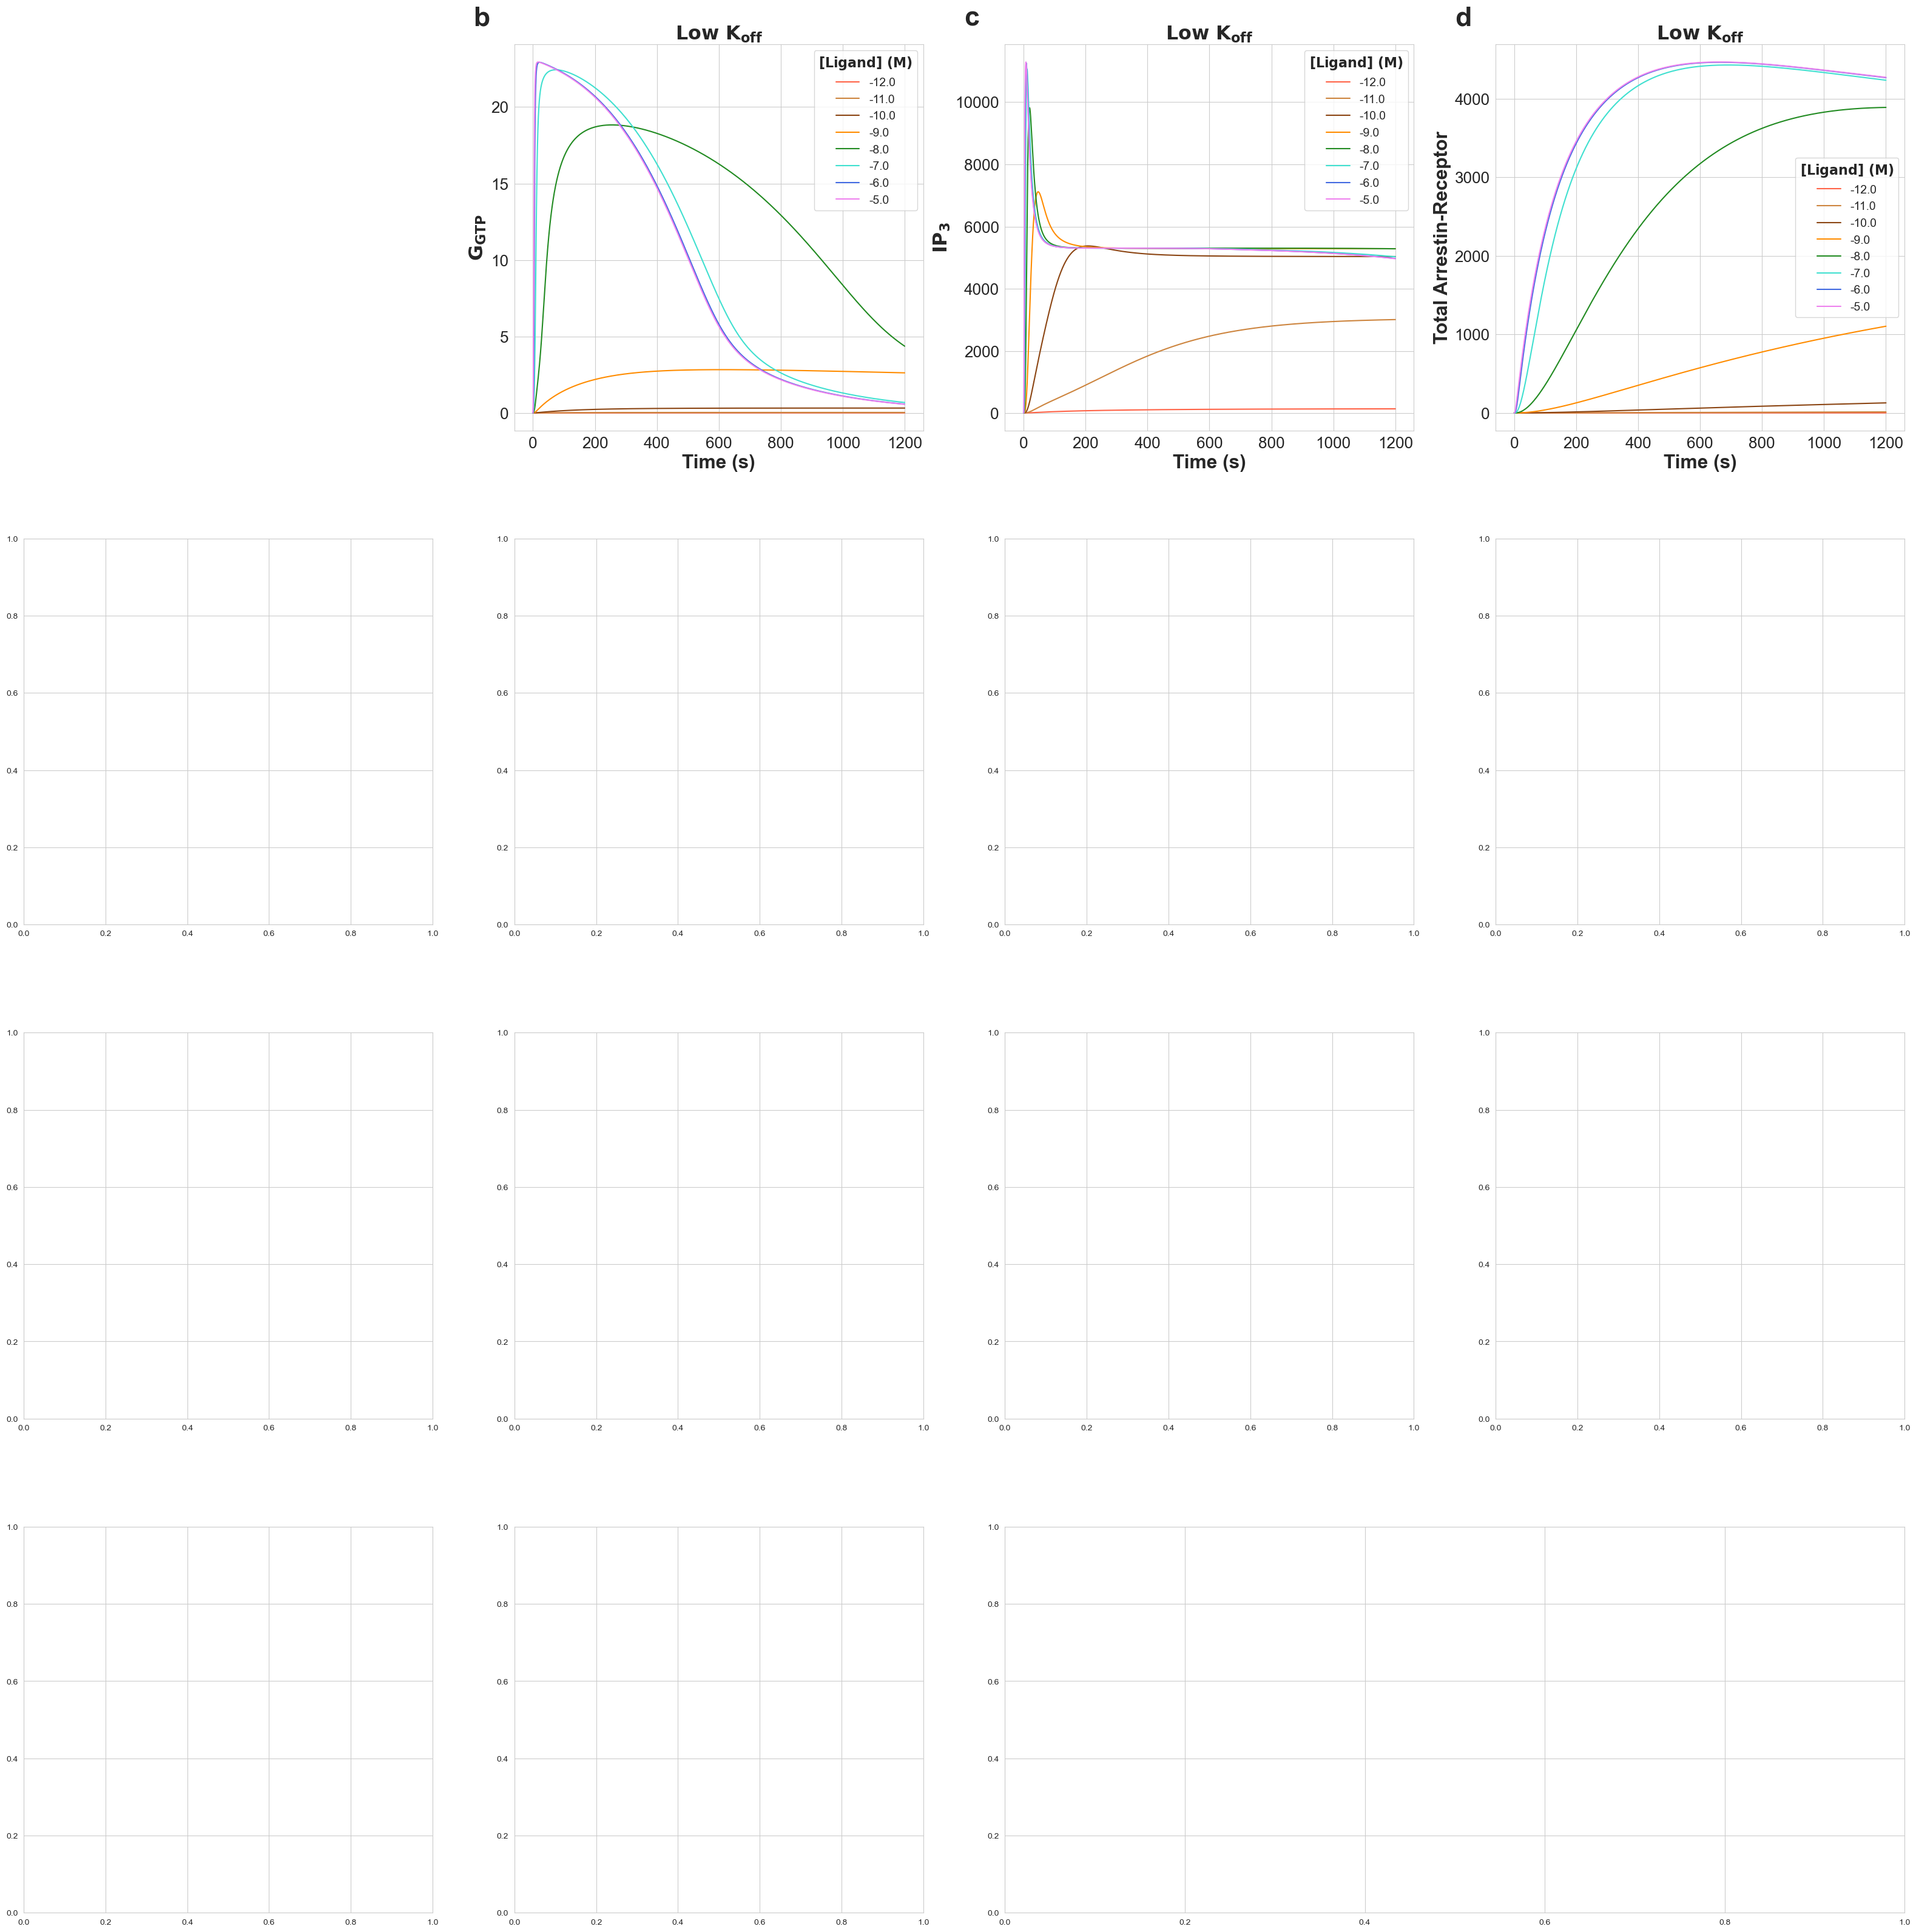

In [184]:
## Define subplots and molecules to plot
subplots_names=['B','C','D']
subplot_labels=['B','C','D']
molecules_to_plot=['$\mathbf{G_{GTP}}$','$\mathbf{IP_{3}}$','Total Arrestin-Receptor']

## Define the parameters for the plots
kon=0.3
koff=0.0003
ligand_ccs=(10 ** np.arange(-6, 1.1, 1))
intern_status='With_internalisation'
process_name='Koff_Kon_all'
color_palette_dict=mcolors.CSS4_COLORS
color_names=['tomato','peru','saddlebrown','darkorange','forestgreen','turquoise','royalblue','violet']



fig_width=40
fig_height=40

fig,ax=plt.subplot_mosaic(subplot_layout,figsize=(fig_width,fig_height),gridspec_kw={'hspace':0.28})


## FOntsize=fig_width*fig_height/title_fontsize_ratio
subplot_label_fontsize_nominator=50
subplot_title_fontsize_nominator=70
subplot_axis_label_fontsize_nominator=70
subplot_axis_tick_label_fontsize_nominator=85
subplot_legend_label_fontsize_nominator=115
legend_title='$\mathbf{[Ligand]\ (M)}$'
subplot_legend_title_fontsize_nominator=100



for subplot_name,molecule,subplot_label in zip(subplots_names,molecules_to_plot,subplot_labels):
    ax[subplot_name],arrestin_receptor_max_response=draw_kinetic_concentration_curve_of_molecule_with_different_ligand_ccs(molecule,molecules_dict,kon,koff,intern_status,process_name,ligand_ccs,\
                                                                           color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                                                           subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                                                           subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                                                           legend_title,subplot_legend_title_fontsize_nominator,subplot_label,\
                                                                           subplot_label_fontsize_nominator)
    if molecule=='Total Arrestin-Receptor':
        with open('../data/temp_data_for_plotting/arrestin_receptor_max_response.pkl','wb') as file:
            pickle.dump(arrestin_receptor_max_response,file)


        
## Save fig and axes object for later to add more subplots to it
with open('../data/temp_data_for_plotting/temporary_plot_B_D_fig_object.pkl','wb') as file:
    pickle.dump(fig,file)
with open('../data/temp_data_for_plotting/temporary_plot_B_D_axes_object.pkl','wb') as file:
    pickle.dump(ax,file)



### Add plots for the second and third row (**E - G**)

In [185]:
def draw_kinetic_concentration_curve_of_molecule_with_different_koff_values(molecule,molecules_dict,kon,koff_list,intern_status,process_name,ligand_ccs,\
                                                                           color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                                                           subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                                                           subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                                                           legend_title,subplot_legend_title_fontsize_nominator,legend_handles,ylim,subplot_label,\
                                                                           subplot_label_fontsize_nominator):
    ## Create directory path to load the data from
    dirname=os.path.join('../data/',intern_status,process_name,'')

    ## Define which subplot we eant to plot into from the original subplot_mosaic object
    axis=ax[subplot_name]

    ## Get color palette 
    colors = [color_palette_dict.get(col) for col in color_names]

    ## Loop over the ligand concentrations, load the respective simulation data from the .csv file
    for koff,color,label in zip(koff_list,colors,legend_handles):
        ## Adjust ligand concentrations to used Kon and Koff values +  convert it from uM/L to M/L (by subtracting 6 from hte logarithmic values of ligand ccs)
        ligands=np.log10(adjust_ligand_ccs(ligand_ccs,koff,kon)) - 6

        label=label + str(koff)
        for ligand in ligands:
            fname=dirname+ '_'.join([process_name,'koff',str(koff),'kon',str(kon),'ligand_cc',str(ligand)]) + '.csv'
            col_nums=[int(x+1) for x in molecules_dict[molecule]]
            col_nums.append(0)
            mol_ccs_df=pd.read_csv(fname, index_col=0,usecols=col_nums)
            plot=axis.plot(mol_ccs_df.index.tolist(),np.sum(mol_ccs_df.loc[:,:],1),label=label,color=color)
    
    ## Customize legend, plot title, axis labels 
    plot_area=fig_width*fig_height

    axis.legend(title=legend_title,title_fontsize=plot_area/subplot_legend_title_fontsize_nominator,\
                fontsize=plot_area/subplot_legend_label_fontsize_nominator)
    
    axis_label_fontsize=plot_area/subplot_axis_label_fontsize_nominator
    axis_tick_labelsize=plot_area/subplot_axis_tick_label_fontsize_nominator

    title_text=intern_status.replace('_','\ ')
    title=r"$\mathbf{{title}}$".replace('title',title_text)
 
    title_fontsize=plot_area/subplot_title_fontsize_nominator
    axis.set_title(title,fontsize=title_fontsize)

    axis.set_xlabel('Time (s)',fontweight="bold",fontsize=axis_label_fontsize)
    axis.set_ylabel(molecule,fontweight="bold",fontsize=axis_label_fontsize)
    axis.tick_params(axis='both', labelsize=axis_tick_labelsize)
    axis.set_ylim(0,ylim)

    ## If plot is in the upper row (=with internalistaion), then add plot label 
    if intern_status=='With_internalisation':
        axis.text(-0.1, 1.05,subplot_label.lower(),weight='bold',size=plot_area/subplot_label_fontsize_nominator,transform=axis.transAxes)
        
    return(plot)

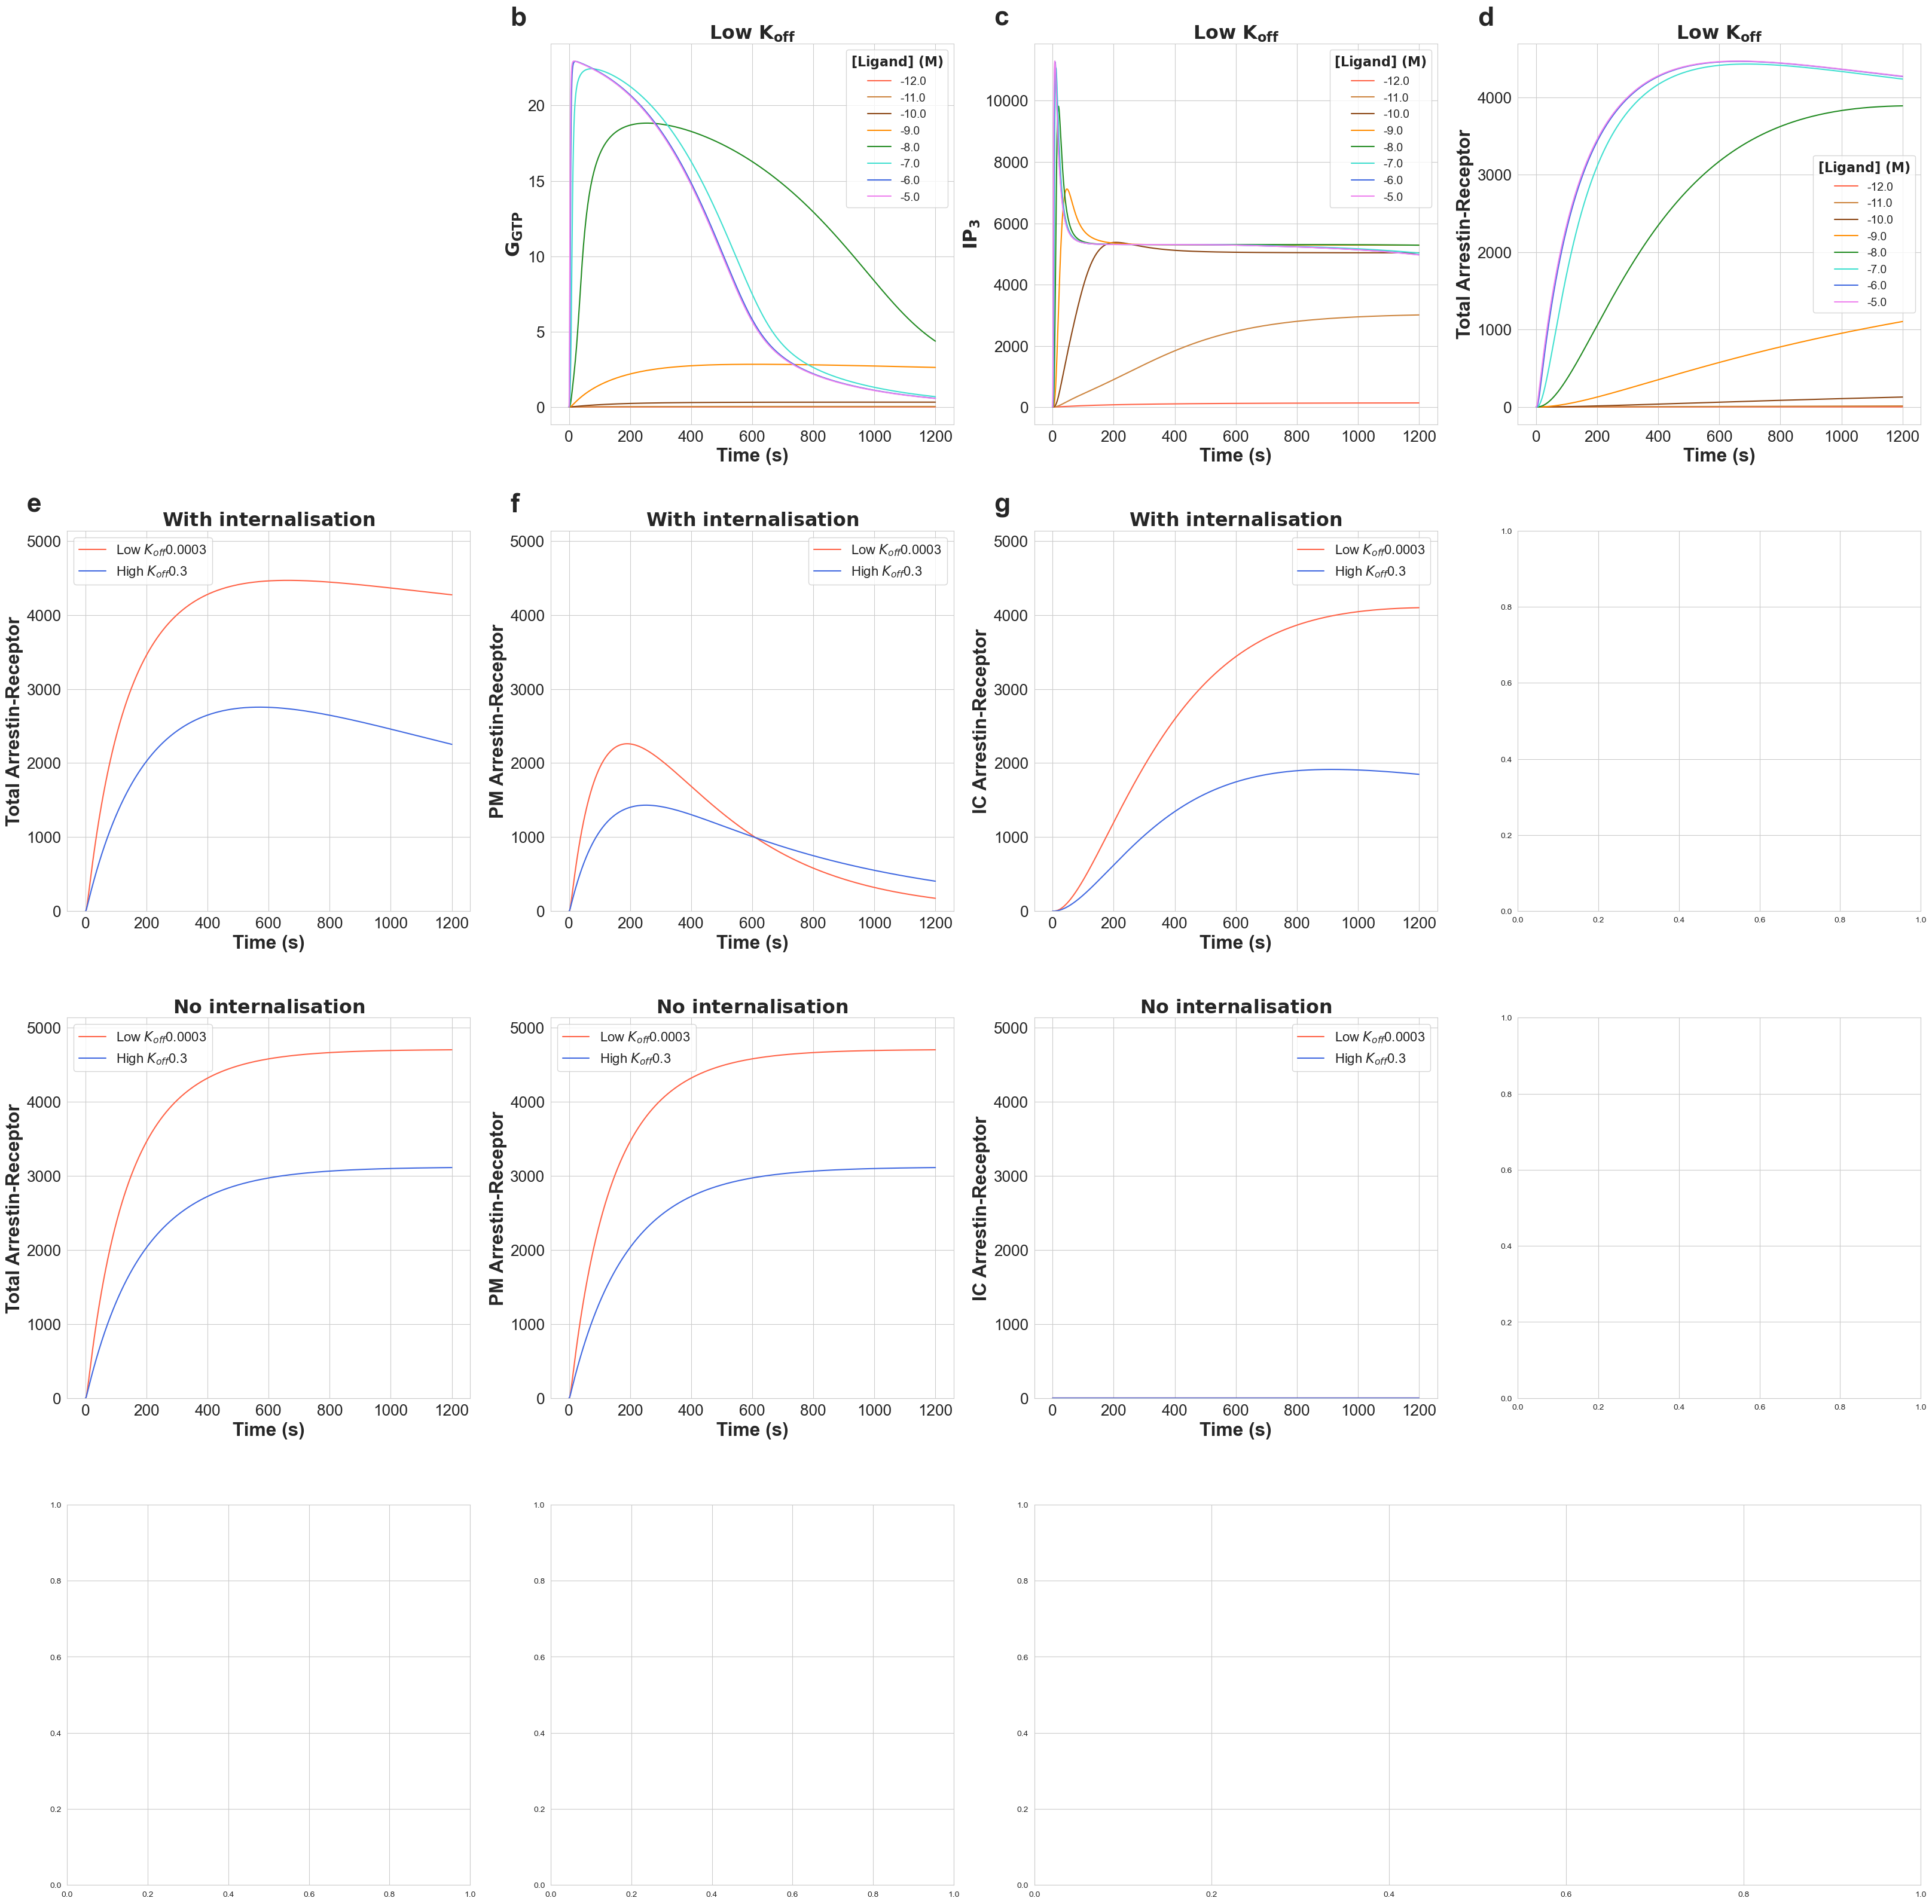

In [186]:
subplots_names=[['E_up','F_up','G_up'],
                ['E_low','F_low','G_low']]
subplot_labels=['E','F','G']
molecules_to_plot=['Total Arrestin-Receptor','PM Arrestin-Receptor','IC Arrestin-Receptor']

kon=0.3
koff_list=[0.0003,high_koff]
internalisation_status=['With_internalisation','No_internalisation']
process_name='Koff_Kon_all'
color_palette_dict=mcolors.CSS4_COLORS
color_names=['tomato','royalblue']#'peru','saddlebrown','darkorange','forestgreen','turquoise','royalblue','violet']

ligand_ccs=(10 ** np.arange(1, 1.1, 1))

fig_width=40
fig_height=40

#fig,ax=plt.subplot_mosaic(subplot_layout,figsize=(fig_width,fig_height))

## FOntsize=fig_width*fig_height/title_fontsize_ratio
subplot_label_fontsize_nominator=50
subplot_title_fontsize_nominator=70
subplot_axis_label_fontsize_nominator=70
subplot_axis_tick_label_fontsize_nominator=85
subplot_legend_label_fontsize_nominator=100
subplot_legend_title_fontsize_nominator=100
#legend_title='$\mathbf{K_{off}}$'
legend_title=None
legend_handles=['Low $K_{off}$','High $K_{off}$']

### Load the previosly ceated figur and axes object to plot to
with open('../data/temp_data_for_plotting/temporary_plot_B_D_fig_object.pkl','rb') as file:
    fig=pickle.load(file)
    plt.close()
with open('../data/temp_data_for_plotting/temporary_plot_B_D_axes_object.pkl','rb') as file:
    ax=pickle.load(file)
with open('../data/temp_data_for_plotting/arrestin_receptor_max_response.pkl','rb') as file:
    arrestin_receptor_max_response=pickle.load(file)

## Set common y-axis limit for all the plots in E-H
ylim=arrestin_receptor_max_response*1.15

for molecule,colnum,subplot_label in zip(molecules_to_plot,range(np.asarray(subplots_names).shape[1]),subplot_labels):
    for intern_status,rownum in zip(internalisation_status,range(np.asarray(subplots_names).shape[0])):
        subplot_name=subplots_names[rownum][colnum]
        ax[subplot_name]=draw_kinetic_concentration_curve_of_molecule_with_different_koff_values(molecule,molecules_dict,kon,koff_list,intern_status,process_name,ligand_ccs,\
                                                                           color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                                                           subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                                                           subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                                                           legend_title,subplot_legend_title_fontsize_nominator,legend_handles,ylim,subplot_label,\
                                                                           subplot_label_fontsize_nominator)

## Save fig and axes object for later to add more subplots to it
with open('../data/temp_data_for_plotting/temporary_plot_B_G_fig_object.pkl','wb') as file:
    pickle.dump(fig,file)
with open('../data/temp_data_for_plotting/temporary_plot_B_G_axes_object.pkl','wb') as file:
    pickle.dump(ax,file)

### Add 2 DR-curve plots (__H__)

In [187]:
def draw_DR_points_plus_fit_DR_curve(molecule,molecules_dict,kon,koff_list,intern_status,process_name,ligand_ccs,\
                                    color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                    subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                    subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                    legend_title,subplot_legend_title_fontsize_nominator,legend_handles,time_to_response,ylim,\
                                    subplot_label,subplot_label_fontsize_nominator,plot_dot_size):
    
    ## Create directory path to load the data from
    dirname=os.path.join('../data/',intern_status,process_name,'')

    ## Define which subplot we want to plot into from the original subplot_mosaic object
    axis=ax[subplot_name]

    ## Get color palette 
    colors = [color_palette_dict.get(col) for col in color_names]

    
    ## Loop over the ligand concentrations, load the respective simulation data from the .csv file
    for koff,color,label in zip(koff_list,colors,legend_handles):
        ## Adjust ligand concentrations to used Kon and Koff values +  convert it from uM/L to M/L (by subtracting 6 from hte logarithmic values of ligand ccs)
        ligands=np.log10(adjust_ligand_ccs(ligand_ccs,koff,kon)) - 6

        ## Create list to save the Dose-Response concentrations of the molecule at the given timepoint for given Koff-kon value pair
        DR_points=[]
        label=label + str(koff)

        for ligand in ligands:
            fname=dirname+ '_'.join([process_name,'koff',str(koff),'kon',str(kon),'ligand_cc',str(ligand)]) + '.csv'
            col_nums=[int(x+1) for x in molecules_dict[molecule]]
            col_nums.append(0)
            mol_ccs_df=pd.read_csv(fname, index_col=0,usecols=col_nums)
            response_at_time=np.sum(mol_ccs_df.loc[time_to_response,:])
            DR_points.append(response_at_time)
        
        ## Function to fit DR curve on the DR-points extracted from the simulated data and return logEC50 for plotting the fitted DR curve
        def func(ligands, logec50):
            return max(DR_points) / (1 + 10 ** (logec50 - np.log10(ligands)))
        logec50, pcov = curve_fit(func, 10**ligands, DR_points,bounds=(-19,-1))

        ## Create x-axis values for DR curve
        ligandrange = np.linspace(ligands[0], ligands[-1], 100)
        axis.plot((ligandrange), func(10 ** ligandrange, logec50), color=color)
        axis.scatter(ligands, DR_points,label=label, color=color,s=plot_dot_size)
        
        
    #plot=axis.plot(mol_ccs_df.index.tolist(),np.sum(mol_ccs_df.loc[:,:],1),label=label,color=color)
    
    ## Customize legend, plot title, axis labels 
    plot_area=fig_width*fig_height

    axis.legend(title=legend_title,title_fontsize=plot_area/subplot_legend_title_fontsize_nominator,\
                fontsize=plot_area/subplot_legend_label_fontsize_nominator)
    
    axis_label_fontsize=plot_area/subplot_axis_label_fontsize_nominator
    axis_tick_labelsize=plot_area/subplot_axis_tick_label_fontsize_nominator

    title_text=intern_status.replace('_','\ ')
    title=r"$\mathbf{{title}}$".replace('title',title_text)
 
    title_fontsize=plot_area/subplot_title_fontsize_nominator
    axis.set_title(title,fontsize=title_fontsize)

    axis.set_xlabel('Time (s)',fontweight="bold",fontsize=axis_label_fontsize)
    axis.set_ylabel(molecule,fontweight="bold",fontsize=axis_label_fontsize)
    axis.tick_params(axis='both', labelsize=axis_tick_labelsize)
    axis.set_ylim(0,ylim)

    ## If plot is in the upper row (=with internalistaion), then add plot label 
    if intern_status=='With_internalisation':
        axis.text(-0.1, 1.05,subplot_label.lower(),weight='bold',size=plot_area/subplot_label_fontsize_nominator,transform=axis.transAxes)

    return(axis)

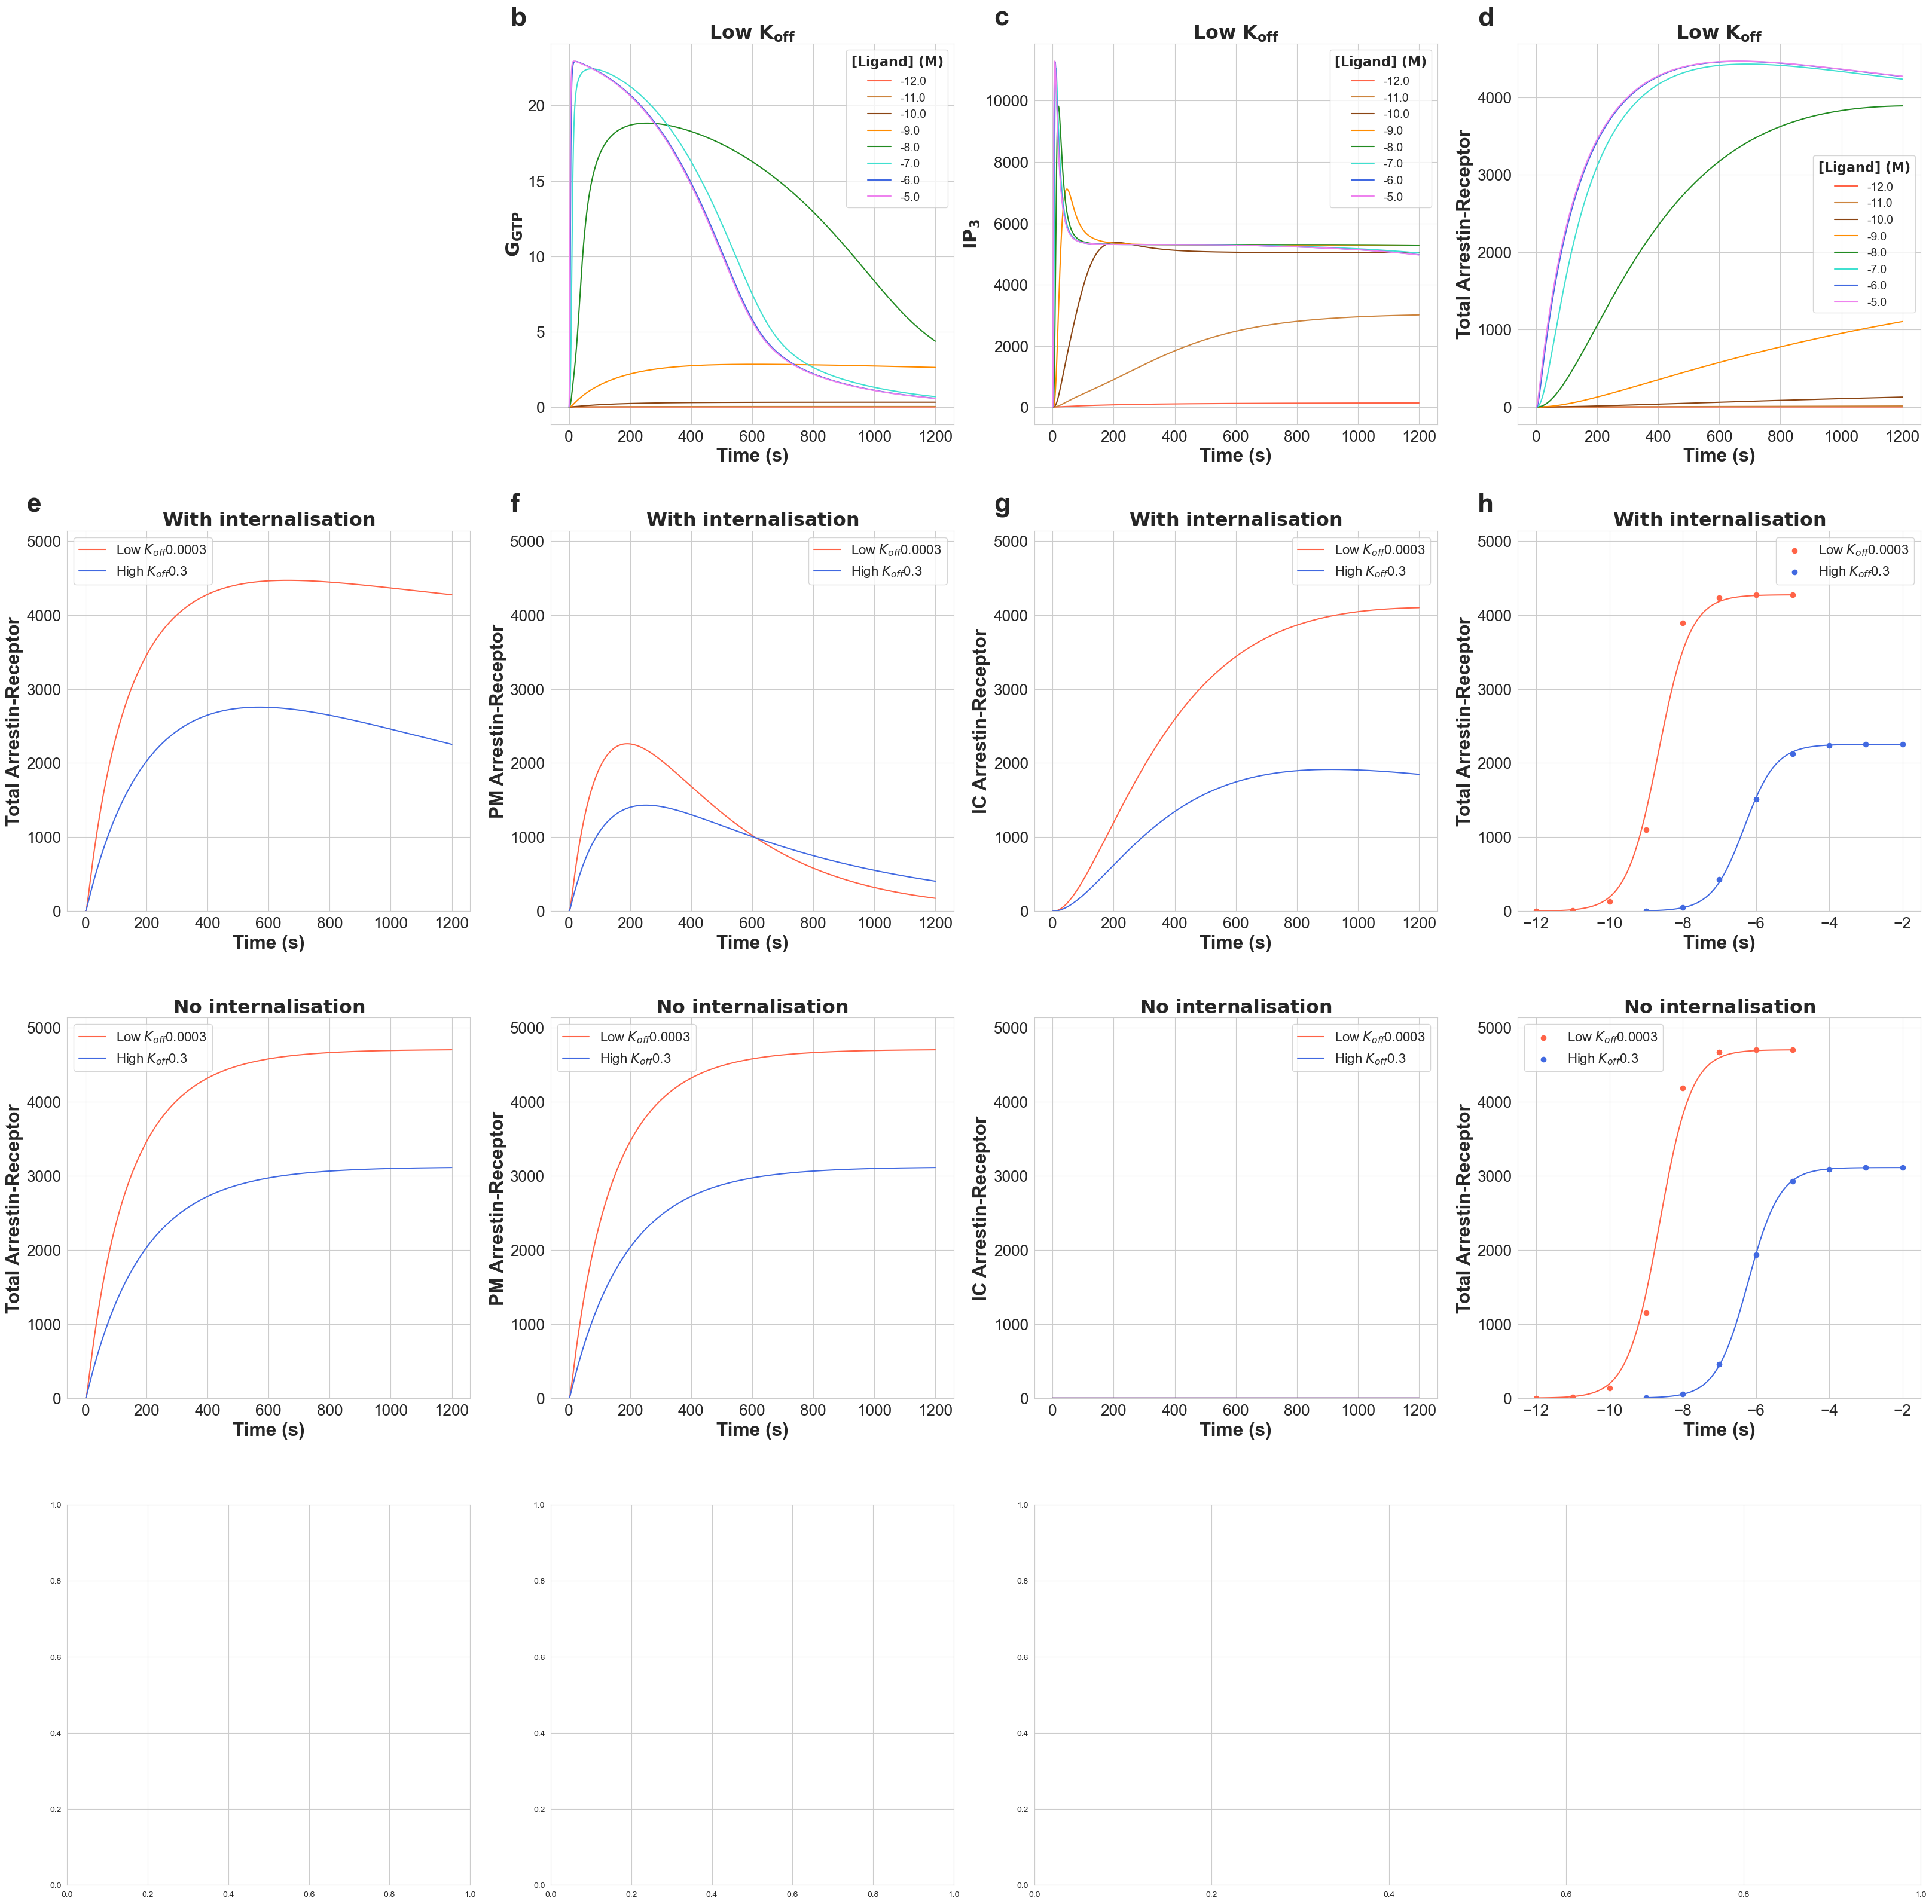

In [188]:
subplots_names=[['H_up'],['H_low']]
subplot_labels=['H']
molecules_to_plot=['Total Arrestin-Receptor']

### Load the previosly ceated figur and axes object to plot to
with open('../data/temp_data_for_plotting/temporary_plot_B_G_fig_object.pkl','rb') as file:
    fig=pickle.load(file)
    plt.close()
with open('../data/temp_data_for_plotting/temporary_plot_B_G_axes_object.pkl','rb') as file:
    ax=pickle.load(file)

time_to_response=1200

kon=0.3
koff_list=[0.0003,high_koff]
internalisation_status=['With_internalisation','No_internalisation']
process_name='Koff_Kon_all'
color_palette_dict=mcolors.CSS4_COLORS
color_names=['tomato','royalblue']#'peru','saddlebrown','darkorange','forestgreen','turquoise','royalblue','violet']

ligand_ccs=(10 ** np.arange(-6, 1.1, 1))

fig_width=40
fig_height=40

#fig,ax=plt.subplot_mosaic(subplot_layout,figsize=(fig_width,fig_height))

## FOntsize=fig_width*fig_height/title_fontsize_ratio
subplot_label_fontsize_nominator=50
subplot_title_fontsize_nominator=70
subplot_axis_label_fontsize_nominator=70
subplot_axis_tick_label_fontsize_nominator=85
subplot_legend_label_fontsize_nominator=100
subplot_legend_title_fontsize_nominator=100
#legend_title='$\mathbf{K_{off}}$'
legend_title=None
legend_handles=['Low $K_{off}$','High $K_{off}$']
plot_dot_size=35



for molecule,colnum,subplot_label in zip(molecules_to_plot,range(np.asarray(subplots_names).shape[1]),subplot_labels):
    for intern_status,rownum in zip(internalisation_status,range(np.asarray(subplots_names).shape[0])):
        subplot_name=subplots_names[rownum][colnum]
        ax[subplot_name]=draw_DR_points_plus_fit_DR_curve(molecule,molecules_dict,kon,koff_list,intern_status,process_name,ligand_ccs,\
                                                        color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                                        subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                                        subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                                        legend_title,subplot_legend_title_fontsize_nominator,legend_handles,time_to_response,ylim,\
                                                        subplot_label,subplot_label_fontsize_nominator,plot_dot_size)

## Save fig and axes object for later to add more subplots to it
with open('../data/temp_data_for_plotting/temporary_plot_B_H_fig_object.pkl','wb') as file:
    pickle.dump(fig,file)
with open('../data/temp_data_for_plotting/temporary_plot_B_H_axes_object.pkl','wb') as file:
    pickle.dump(ax,file)


### Add Emax-logEC50 plots (__I - J__)

In [189]:
def draw_emax_ec50_plot(molecule,molecules_dict,kon_list,koff_list,intern_status,process_name,ligand_ccs,\
                        color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                        subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                        subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                        legend_title,subplot_legend_title_fontsize_nominator,legend_handles,time_to_response,ylim,\
                        subplot_label,subplot_label_fontsize_nominator,marker_size_nominator,marker_list):
    
    ## Create directory path to load the data from
    dirname=os.path.join('../data/',intern_status,process_name,'')

    ## Define which subplot we want to plot into from the original subplot_mosaic object
    axis=ax[subplot_name]

    ## Get color palette 
    colors = [color_palette_dict.get(col) for col in color_names]

    plot_area=fig_width*fig_height

    ## Loop over the ligand concentrations, load the respective simulation data from the .csv file
    for kon,color in zip(kon_list,colors):
        Emax_list=[]
        logec50_list=[]
        for koff in koff_list:
            ## Adjust ligand concentrations to used Kon and Koff values +  convert it from uM/L to M/L (by subtracting 6 from hte logarithmic values of ligand ccs)
            ligands=np.log10(adjust_ligand_ccs(ligand_ccs,koff,kon)) - 6

            ## Create list to save the Dose-Response concentrations of the molecule at the given timepoint for given Koff-kon value pair
            DR_points=[]

            for ligand in ligands:
                fname=dirname+ '_'.join([process_name,'koff',str(koff),'kon',str(kon),'ligand_cc',str(ligand)]) + '.csv'
                col_nums=[int(x+1) for x in molecules_dict[molecule]]
                col_nums.append(0)
                mol_ccs_df=pd.read_csv(fname, index_col=0,usecols=col_nums)
                response_at_time=np.sum(mol_ccs_df.loc[time_to_response,:])
                DR_points.append(response_at_time)
            
            ## Function to fit DR curve on the DR-points extracted from the simulated data and return logEC50 for plotting the fitted DR curve
            def func(ligands, logec50):
                return max(DR_points) / (1 + 10 ** (logec50 - np.log10(ligands)))
            logec50, pcov = curve_fit(func, 10**ligands, DR_points,bounds=(-19,-1))

            ## Add EC50 and Emax to list
            logec50_list.append(logec50)
            Emax_list.append(DR_points[-1])

        ## Plot the Emax values on the y-axis and logec50 values on the x-axis
        for logec50,Emax,marker,koff in zip(logec50_list,Emax_list,marker_list,koff_list):
            axis.scatter(logec50, Emax,label=str(kon)+ ' - '+str(koff), color=color,s=plot_area/marker_size_nominator,marker=marker)
        
        
    #plot=axis.plot(mol_ccs_df.index.tolist(),np.sum(mol_ccs_df.loc[:,:],1),label=label,color=color)
    
    ## Customize legend, plot title, axis labels 

    axis.legend(title=legend_title,title_fontsize=plot_area/subplot_legend_title_fontsize_nominator,\
                fontsize=plot_area/subplot_legend_label_fontsize_nominator)
    
    axis_label_fontsize=plot_area/subplot_axis_label_fontsize_nominator
    axis_tick_labelsize=plot_area/subplot_axis_tick_label_fontsize_nominator

    title_text=intern_status.replace('_','\ ')
    title="$\mathbf{E_{max}}$" +' - ' "$\mathbf{logEC_{50}}$"
    title_fontsize=plot_area/subplot_title_fontsize_nominator
    axis.set_title(title,fontsize=title_fontsize)

    axis.set_xlabel('$\mathbf{logEC_{50}}$',fontweight="bold",fontsize=axis_label_fontsize)

    ## If molecule is G_GTP, then do not change anything on that part of the string, as it is already TeX formulated
    if 'GTP' in molecule:
        y_axis_label=molecule + "\n"+ "$\mathbf{(E_{max})}$"
    
    ## TeX formulate Total Arrestin-Receptor string
    else:
        label_text=molecule.replace(' ','\ ')
        y_axis_label=r"$\mathbf{{title}}$".replace('title',label_text) + "\n"+ "$\mathbf{(E_{max})}$"

    axis.set_ylabel(y_axis_label,fontweight="bold",fontsize=axis_label_fontsize)
    axis.tick_params(axis='both', labelsize=axis_tick_labelsize)
    #axis.set_ylim(0,ylim)

    axis.text(-0.1, 1.05,subplot_label.lower(),weight='bold',size=plot_area/subplot_label_fontsize_nominator,transform=axis.transAxes)

    return(axis)

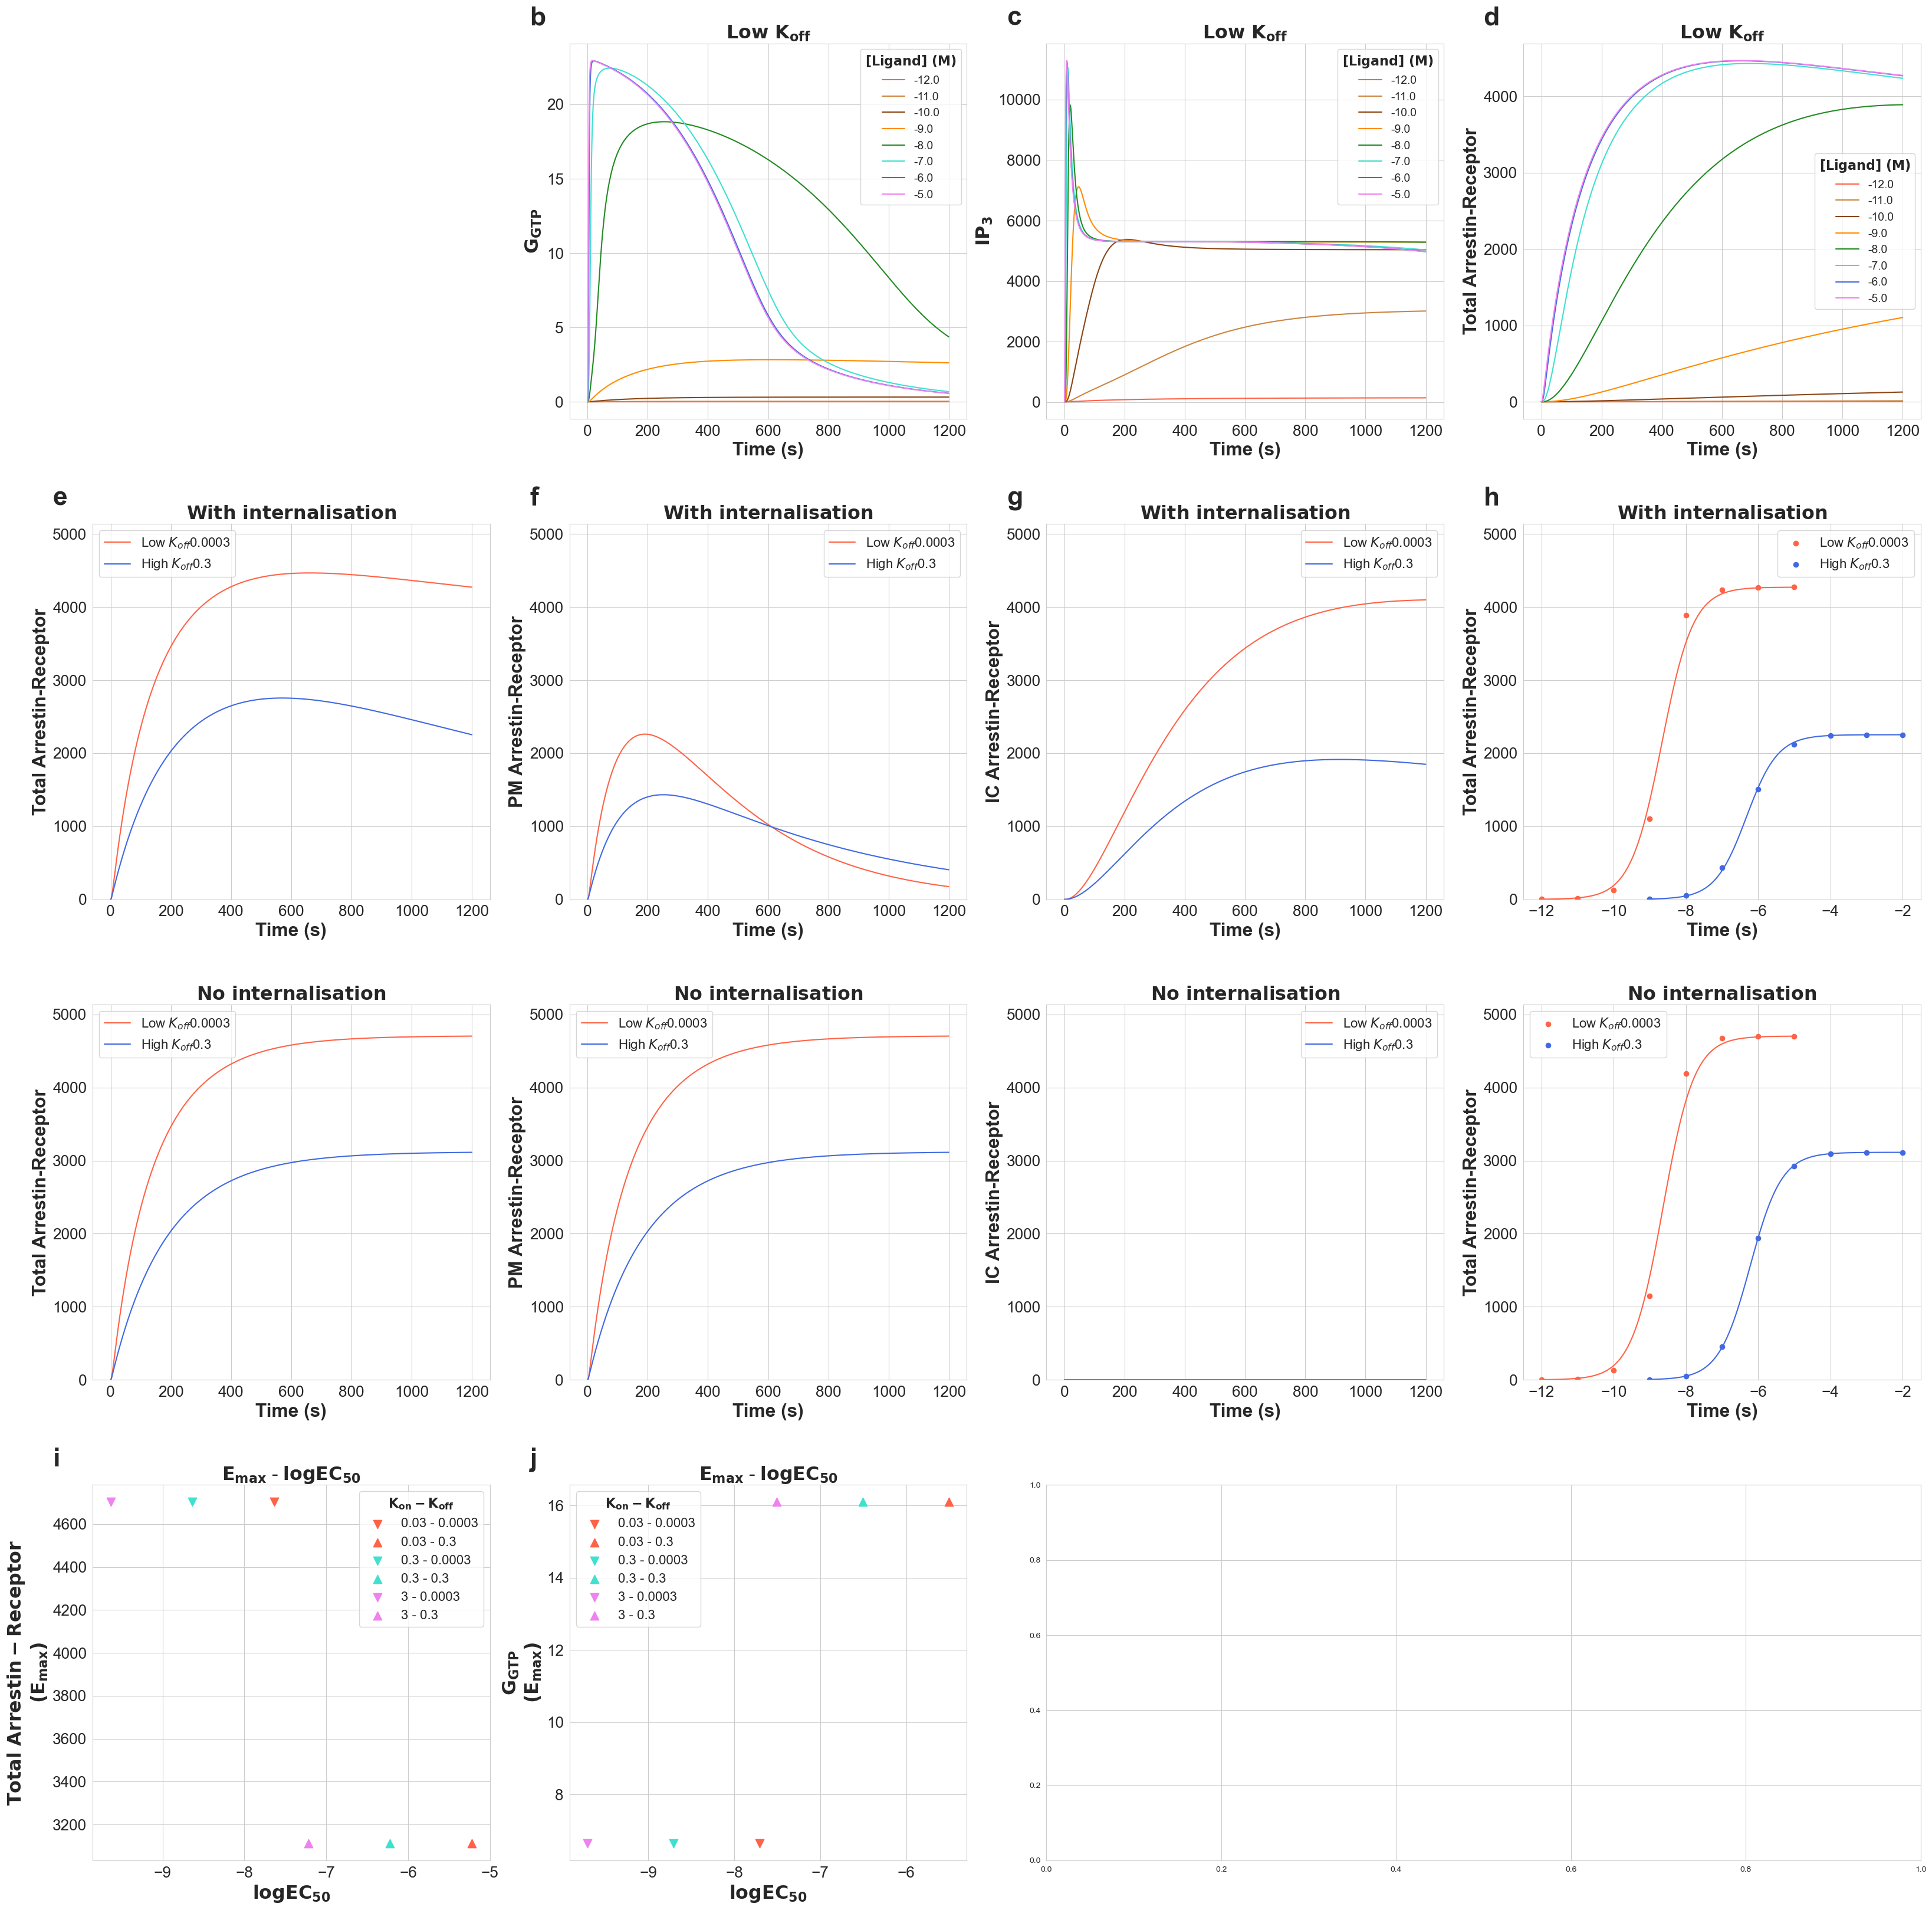

In [190]:
subplots_names=['I','J']
subplot_labels=['I','J']
molecules_to_plot=['Total Arrestin-Receptor','$\mathbf{G_{GTP}}$']

### Load the previosly ceated figur and axes object to plot to
with open('../data/temp_data_for_plotting/temporary_plot_B_H_fig_object.pkl','rb') as file:
    fig=pickle.load(file)
    plt.close()
with open('../data/temp_data_for_plotting/temporary_plot_B_H_axes_object.pkl','rb') as file:
    ax=pickle.load(file)

time_to_response=1200

kon_list=[0.03,0.3,3]
koff_list=[0.0003,high_koff]
internalisation_status=['With_internalisation','No_internalisation']
process_name='Koff_Kon_all'
color_palette_dict=mcolors.CSS4_COLORS
color_names=['tomato','turquoise','violet']#'peru','saddlebrown','darkorange','forestgreen','turquoise','royalblue','violet']

ligand_ccs=(10 ** np.arange(-6, 1.1, 1))

fig_width=40
fig_height=40


## FOntsize=fig_width*fig_height/title_fontsize_ratio
subplot_label_fontsize_nominator=50
subplot_title_fontsize_nominator=70
subplot_axis_label_fontsize_nominator=70
subplot_axis_tick_label_fontsize_nominator=85
subplot_legend_label_fontsize_nominator=100
subplot_legend_title_fontsize_nominator=100
legend_title='$\mathbf{K_{on}-K_{off}}$'
#legend_handles=['Low $K_{off}$','High $K_{off}$']
marker_size_nominator=15

marker_list=["v","^"]



for molecule,subplot_name,subplot_label in zip(molecules_to_plot,subplots_names,subplot_labels):
        ax[subplot_name]=draw_emax_ec50_plot(molecule,molecules_dict,kon_list,koff_list,intern_status,process_name,ligand_ccs,\
                                            color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                            subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                            subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                            legend_title,subplot_legend_title_fontsize_nominator,legend_handles,time_to_response,ylim,\
                                            subplot_label,subplot_label_fontsize_nominator,marker_size_nominator,marker_list)

## Save fig and axes object for later to add more subplots to it
with open('../data/temp_data_for_plotting/temporary_plot_B_J_fig_object.pkl','wb') as file:
    pickle.dump(fig,file)
with open('../data/temp_data_for_plotting/temporary_plot_B_J_axes_object.pkl','wb') as file:
    pickle.dump(ax,file)


### Add Kinetic bias heatmap  (__K__)

In [191]:
def draw_kinetic_bias_heatmap(pathway1,pathway2,molecules_dict,kon,koff_list,intern_status,process_name,ligand_ccs,\
                        color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                        subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                        subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                        legend_title,hm_cbar_legend_title_fontsize_nominator,legend_handles,timepoint_list,ylim,\
                        subplot_label,subplot_label_fontsize_nominator,hm_annot_fontsize_nominator,hm_cbar_axis_fontsize_nominator,\
                        high_koff):
    
    ## Create directory path to load the data from
    dirname=os.path.join('../data/',intern_status,process_name,'')

    ## Define which subplot we want to plot into from the original subplot_mosaic object
    axis=ax[subplot_name]

    ## Get color palette 
    colors = [color_palette_dict.get(col) for col in color_names]

    plot_area=fig_width*fig_height


    ## Create dictionary to collect results for each timepoint
    bias_factor_results_dict={}
    for time_to_response in timepoint_list:
        bias_factor_results_dict[time_to_response]={}
        for koff in koff_list:
            bias_factor_results_dict[time_to_response][koff]={}
            ## Collect Emax and logEC50 values for both reference and query ligand
            emax_dict={}
            ec50_dict={}
            for ligand_type,kon_ligand,koff_ligand in zip(['reference','ligand'],[0.3,kon],[0.0003,koff]):
                emax_dict[ligand_type]={}
                ec50_dict[ligand_type]={}

                ## Calculate Emax and logEC50 for both molecules per ligand type. 
                #  The bias factor is a comparison of the concentrations of the 2 molecules, 
                #  which indicates how biased the ligand is towards one of the compared pathways
                for pathway in [pathway1,pathway2]:                                                   
                    ## Create list to save the Dose-Response concentrations of the molecule at the given timepoint for given Koff-kon value pair
                    DR_points=[]

                    ## Adjust ligand concentrations to used Kon and Koff values +  convert it from uM/L to M/L 
                    # (by subtracting 6 from hte logarithmic values of ligand ccs)
                    ligands=np.log10(adjust_ligand_ccs(ligand_ccs,koff_ligand,kon_ligand)) - 6

                    ## Loop over the ligand concentrations, load the respective simulation data from the .csv file
                    #  Extractn the molecule concantration at given timepoint -> collect it to DR_points
                    for ligand in ligands:
                        fname=dirname+ '_'.join([process_name,'koff',str(koff_ligand),'kon',str(kon_ligand),'ligand_cc',str(ligand)]) + '.csv'
                        col_nums=[int(x+1) for x in molecules_dict[pathway]]
                        col_nums.append(0)
                        mol_ccs_df=pd.read_csv(fname, index_col=0,usecols=col_nums)
                        response_at_time=np.sum(mol_ccs_df.loc[time_to_response,:])
                        DR_points.append(response_at_time)     

                    ## Function to fit DR curve on the DR-points extracted from the simulated data and return logEC50 for calculating bias factor
                    def func(ligands, logec50):
                        return max(DR_points) / (1 + 10 ** (logec50 - np.log10(ligands)))
                    logec50, pcov = curve_fit(func, 10**ligands, DR_points,bounds=(-19,-1))

                    ## Add EC50 and Emax values to respective dictionaries
                    emax_dict[ligand_type][pathway]=DR_points[-1]
                    ec50_dict[ligand_type][pathway]=10**logec50

            ## Assign elements to variables in order make to calculation of Bias factor easy to interpret
            emax_p1_ref=emax_dict['reference'][pathway1]
            emax_p2_ref=emax_dict['reference'][pathway2]
            ec50_p1_ref=ec50_dict['reference'][pathway1]
            ec50_p2_ref=ec50_dict['reference'][pathway2]
            emax_p1_lig=emax_dict['ligand'][pathway1]
            emax_p2_lig=emax_dict['ligand'][pathway2]
            ec50_p1_lig=ec50_dict['ligand'][pathway1]
            ec50_p2_lig=ec50_dict['ligand'][pathway2]

            # Calculate Bias factor
            bias_factor=math.log10(((emax_p1_lig*ec50_p2_lig)/(ec50_p1_lig*emax_p2_lig)) * ((emax_p2_ref*ec50_p1_ref)/(ec50_p2_ref*emax_p1_ref)))
            
            ## Round bias factor to 0 if sufficiently enough to 0
            if abs(bias_factor)<0.000001:
                bias_factor=0
            bias_factor_results_dict[time_to_response][koff]=bias_factor

    ## Convert dictionery of result to DataFrame and plot a heatmap
    bias_factor_df=pd.DataFrame.from_dict(bias_factor_results_dict)
    bias_factor_df=bias_factor_df.set_axis(["$\mathbf{Low\ K_{off}}$","$\mathbf{High\ K_{off}}$"])
    
    # PLot heatmap and customize legend
    if high_koff==0.03:
        vmin=-1
        cbar_ticks=[-1,0.5,0,0.5]
    if high_koff==0.3:
        vmin=-1.5
        cbar_ticks=[-1.5,-1,0.5,0,0.5]

    hm=sns.heatmap(bias_factor_df,annot=True,cmap="YlGnBu", ax=axis,fmt='.3f',vmin=vmin,vmax=0.5,
                   cbar_kws={'ticks':cbar_ticks,
                             'label':legend_title,
                             'fraction':0.08},
                   annot_kws={'fontsize':plot_area/hm_annot_fontsize_nominator})   
    cbar_ax=hm.figure.axes[-1]
    cbar_ax.tick_params(labelsize=plot_area/hm_cbar_axis_fontsize_nominator)
    cbar_ax.yaxis.label.set_size(plot_area/hm_cbar_legend_title_fontsize_nominator)    
   
    ## Customize legend, plot title, axis labels        

    #axis.legend(title=legend_title,title_fontsize=plot_area/subplot_legend_title_fontsize_nominator,\
    #            fontsize=plot_area/subplot_legend_label_fontsize_nominator)
    
    axis_label_fontsize=plot_area/subplot_axis_label_fontsize_nominator
    axis_tick_labelsize=plot_area/subplot_axis_tick_label_fontsize_nominator

    ## If pathwy1 is G_GTP, then do not change anything on that part of the string, as it is already TeX formulated and
    #  TeX formulate Total Arrestin-Receptor string
    if 'GTP' in pathway1:
        title_text2=pathway1
        title_text1=pathway1.replace(' ','\ ')
        title_text1="$\mathbf{{title}}$".replace('title',title_text1)
    elif 'GTP' in pathway2:
        title_text2=pathway1.replace(' ','\ ')
        title_text2="$\mathbf{{title}}$".replace('title',title_text2)
        title_text1=pathway2

    title="$\mathbf{Bias\ factor}$" +" (" +title_text1+ ' vs. ' +title_text2 +')'
    title_fontsize=plot_area/subplot_title_fontsize_nominator
    axis.set_title(title,fontsize=title_fontsize,fontweight='bold')

    axis.set_xlabel('Time (s)',fontweight="bold",fontsize=axis_label_fontsize)

    axis.tick_params(axis='both', labelsize=axis_tick_labelsize)
    #axis.set_ylim(0,ylim)

    axis.text(-0.1, 1.05,subplot_label.lower(),weight='bold',size=plot_area/subplot_label_fontsize_nominator,transform=axis.transAxes)

    return(hm)

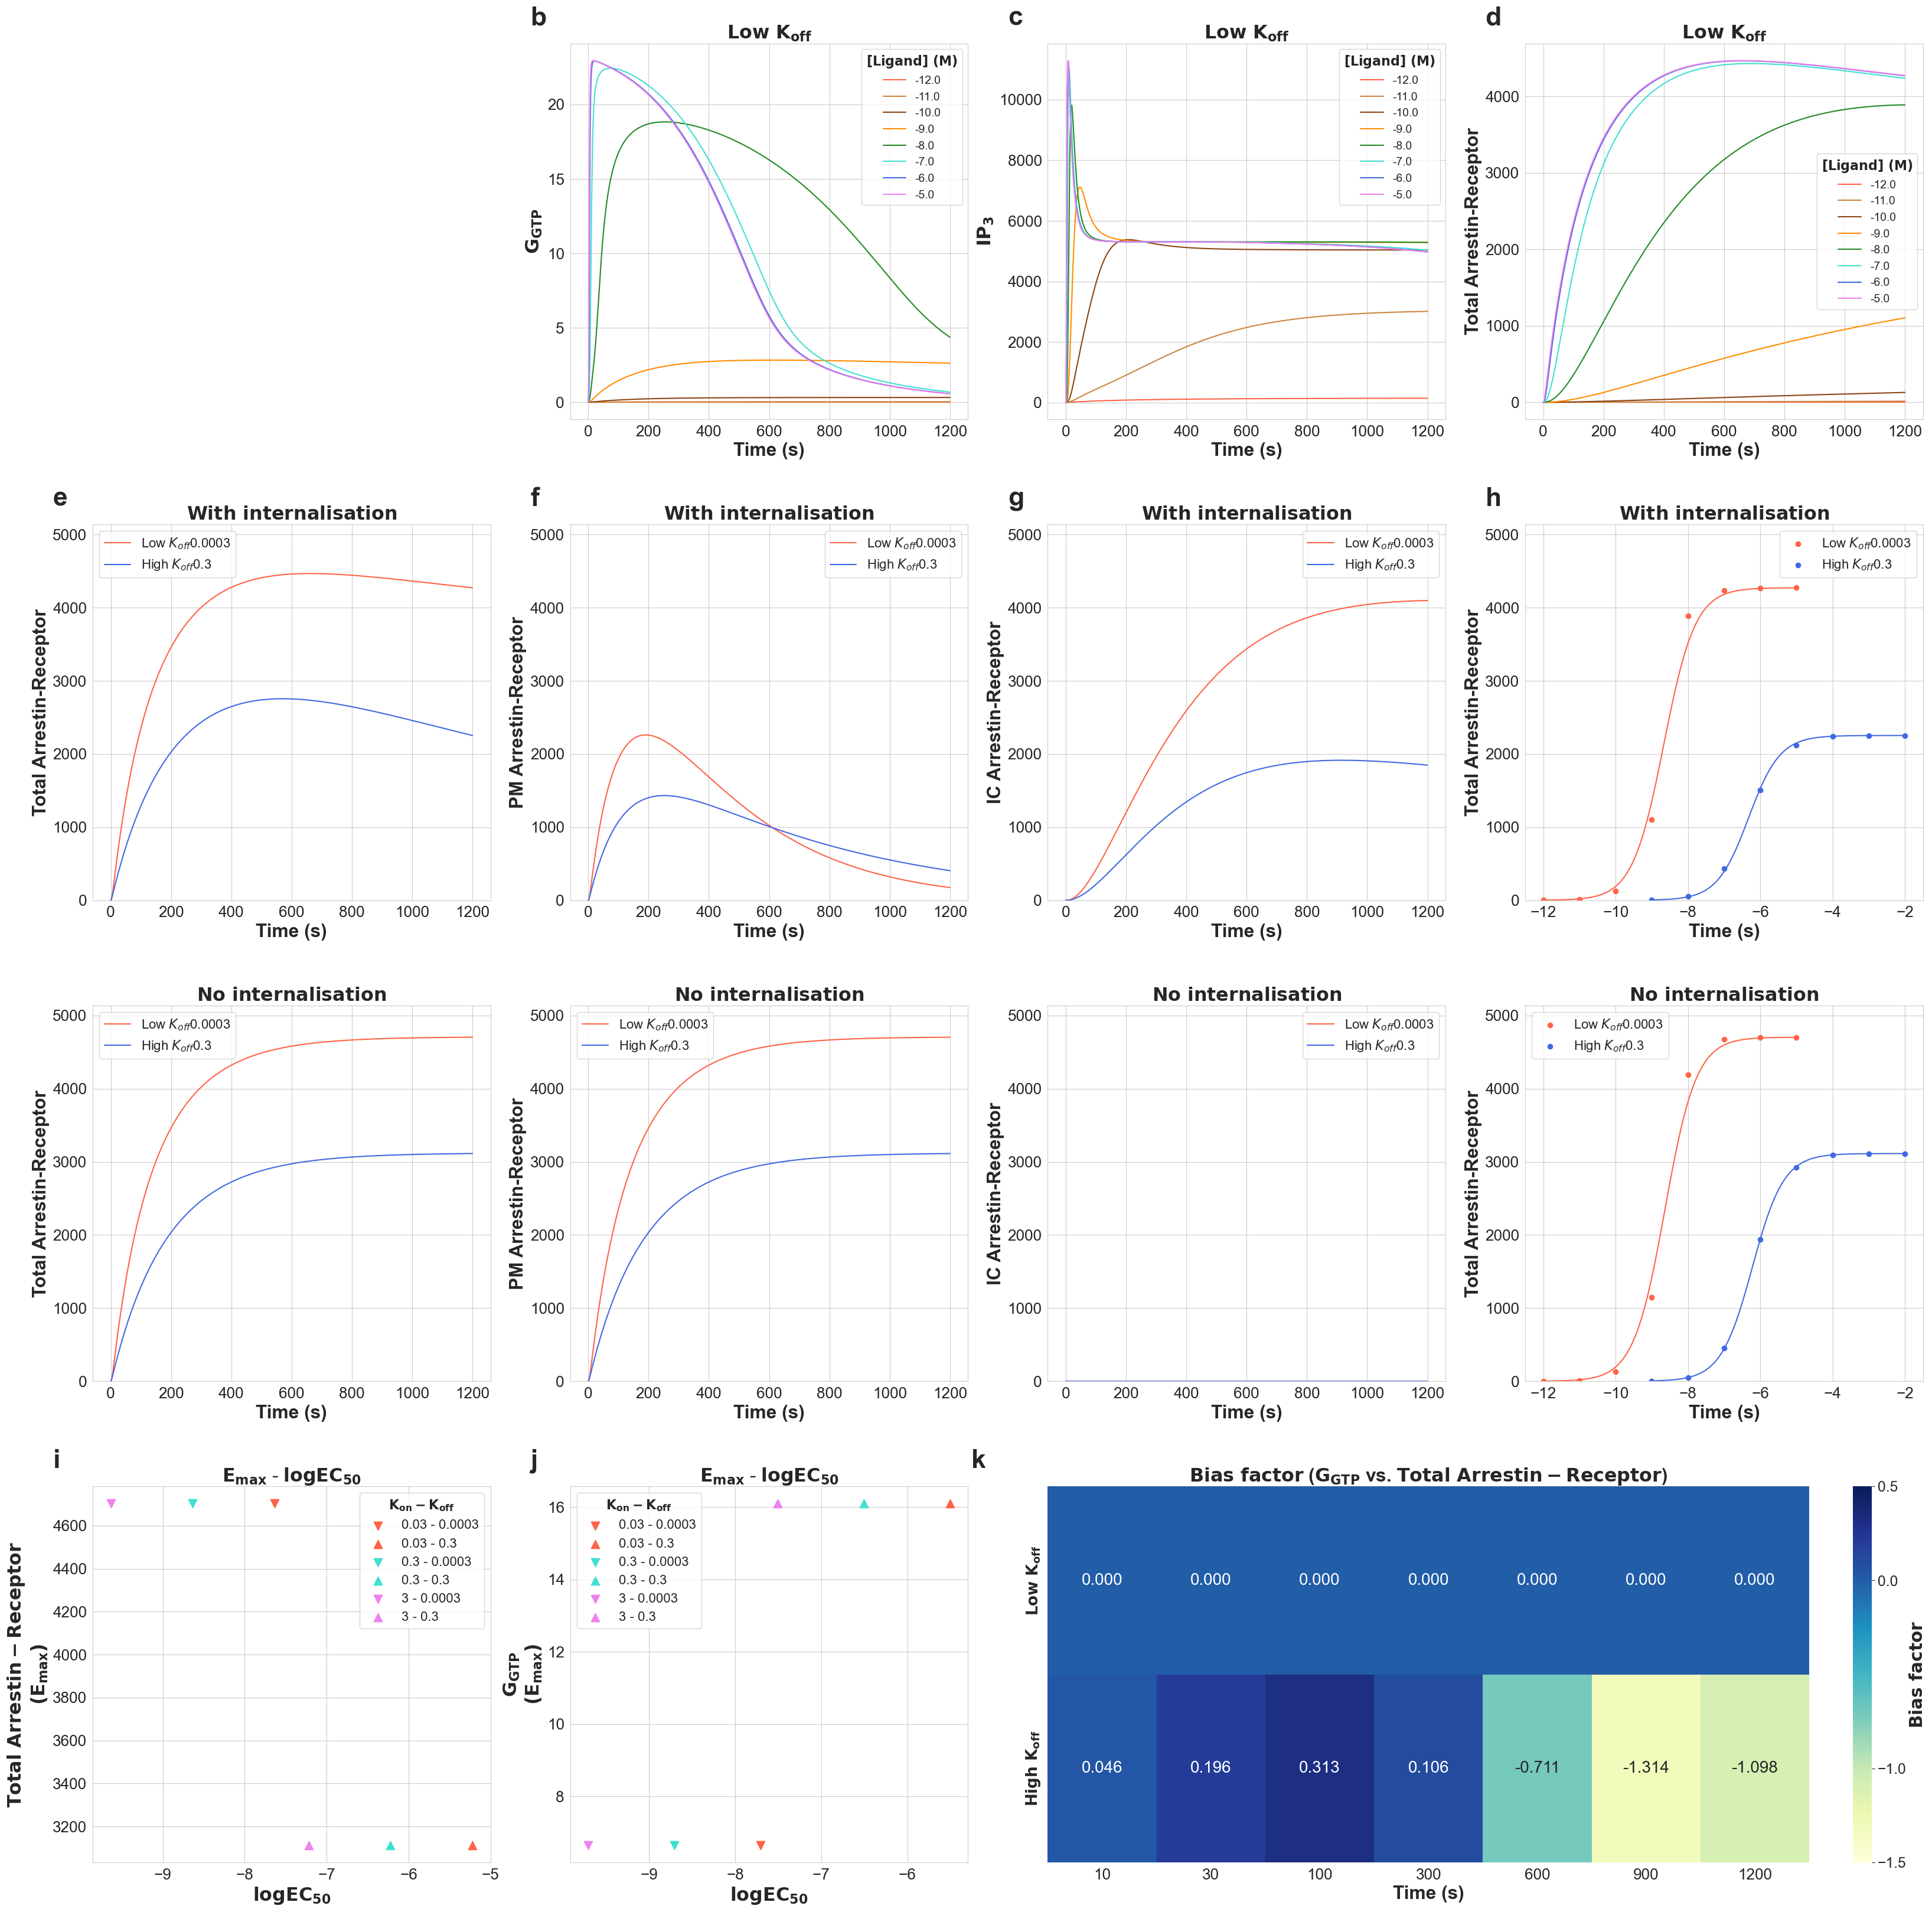

In [192]:
subplots_names=['K']
subplot_labels=['K']
molecules=['Total Arrestin-Receptor','$\mathbf{G_{GTP}}$']

pathway1='Total Arrestin-Receptor'
pathway2='$\mathbf{G_{GTP}}$'

### Load the previosly ceated figur and axes object to plot to
with open('../data/temp_data_for_plotting/temporary_plot_B_J_fig_object.pkl','rb') as file:
    fig=pickle.load(file)
    plt.close()
with open('../data/temp_data_for_plotting/temporary_plot_B_J_axes_object.pkl','rb') as file:
    ax=pickle.load(file)

time_to_response=1200

timepoint_list=[10,30,100,300,600,900,1200]
kon_list=[0.3]
kon=0.3
koff_list=[0.0003,high_koff]
internalisation_status=['With_internalisation','No_internalisation']
intern_status='With_internalisation'
process_name='Koff_Kon_all'
color_palette_dict=mcolors.CSS4_COLORS
color_names=['tomato','turquoise','violet']#'peru','saddlebrown','darkorange','forestgreen','turquoise','royalblue','violet']

ligand_ccs=(10 ** np.arange(-6, 1.1, 1))

fig_width=40
fig_height=40


## FOntsize=fig_width*fig_height/title_fontsize_ratio
subplot_label_fontsize_nominator=50
subplot_title_fontsize_nominator=70
subplot_axis_label_fontsize_nominator=70
subplot_axis_tick_label_fontsize_nominator=85
subplot_legend_label_fontsize_nominator=100

legend_title='$\mathbf{Bias\ factor}$'
#legend_handles=['Low $K_{off}$','High $K_{off}$']
hm_annot_fontsize_nominator=80

hm_cbar_axis_fontsize_nominator=90
hm_cbar_legend_title_fontsize_nominator=75


for subplot_name,subplot_label in zip(subplots_names,subplot_labels):
        ax[subplot_name]=draw_kinetic_bias_heatmap(pathway1,pathway2,molecules_dict,kon,koff_list,intern_status,process_name,ligand_ccs,\
                                                color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                                subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                                subplot_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                                legend_title,hm_cbar_legend_title_fontsize_nominator,legend_handles,timepoint_list,ylim,\
                                                subplot_label,subplot_label_fontsize_nominator,hm_annot_fontsize_nominator,hm_cbar_axis_fontsize_nominator,
                                                high_koff)

plt.savefig('../data/temp_data_for_plotting/temporary_plot_B_K.png',dpi=300,bbox_inches='tight')
## Save fig and axes object for later to add more subplots to it
with open('../data/temp_data_for_plotting/temporary_plot_B_K_fig_object.pkl','wb') as file:
    pickle.dump(fig,file)
with open('../data/temp_data_for_plotting/temporary_plot_B_K_axes_object.pkl','wb') as file:
    pickle.dump(ax,file)

### Create and save boxplots with perturbations of different cellular processes heatmap  (__L__)

In [193]:
def create_perturbations_df(molecules,molecules_dict,kon,koff,intern_status,perturbed_processes,ligand_ccs,time_to_response,\
                            factor_list):

    
    ## Adjust ligand concentrations to used Kon and Koff values +  convert it from uM/L to M/L (by subtracting 6 from hte logarithmic values of ligand ccs)
    ligands=np.log10(adjust_ligand_ccs(ligand_ccs,koff,kon)) - 6

    ## Create dataframe to collect all of the results into
    perturbations_df_colnames=molecules + ['Factor','Perturbed process']
    perturbations_df=pd.DataFrame(columns=perturbations_df_colnames)
    
    for process_name in perturbed_processes:
        ## Create directory path to load the data from
        dirname=os.path.join('../data/',intern_status,process_name,'')
        
        ## Create temporary dictionary collect the results of one perturbed process, which will get converted to DataFrame concatenated to perturbations_df
        process_results_dict={}
        
        for factor in factor_list:
            process_results_dict[factor]={}
            for molecule in molecules:
                                                
                ## Create list to save the Dose-Response concentrations of the molecule at the given timepoint for given Koff-kon value pair
                DR_points=[]

                ## Loop over the ligand concentrations, load the respective simulation data from the .csv file
                for ligand in ligands:
                    fname=dirname+ '_'.join([process_name,str(factor),'koff',str(koff),'kon',str(kon),'ligand_cc',str(ligand)]) + '.csv'
                    col_nums=[int(x+1) for x in molecules_dict[molecule]]
                    col_nums.append(0)
                    mol_ccs_df=pd.read_csv(fname, index_col=0,usecols=col_nums)
                    response_at_time=np.sum(mol_ccs_df.loc[time_to_response,:])
                    DR_points.append(response_at_time)
                
                ## Append Emax value at given perturbation factor for given molecule, for given process and Koff/Kon
                process_results_dict[factor][molecule]=DR_points[-1]
        
        ## Convert the results of perturbation of one process into a DataFrame
        process_df=pd.DataFrame.from_dict(process_results_dict)
        process_df=process_df.T
        process_df['Perturbed process']=process_name
        process_df=process_df.rename_axis('Factor').reset_index()


        ## Concatenate the results from one process to the main result dataframe
        perturbations_df=pd.concat([perturbations_df,process_df],join="outer",ignore_index=True)

    return perturbations_df



def create_perturbations_boxplot(perturbations_df,molecules,molecules_dict,kon,koff,intern_status,perturbed_processes,ligand_ccs,\
                                color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                subplot_y_axis_tick_label_fontsize_nominator,subplot_x_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                legend_title,subplot_legend_title_fontsize_nominator,legend_handles,time_to_response,ylim,\
                                subplot_label,subplot_label_fontsize_nominator,marker_size_nominator,factor_list,figure_title,\
                                figure_title_fontsize_nominator,palette):
    

    ## Get color palette 
    colors = [color_palette_dict.get(col) for col in color_names]
    plot_area=fig_width*fig_height

    ## Define which subplot we want to plot into from the original subplot_mosaic object
    #axis=ax[subplot_name]

    plot_df=perturbations_df.melt(id_vars=["Factor",'Perturbed process'],var_name="Molecule",value_name="Values")
    plot_df['Factor']=plot_df['Factor'].astype(str)
    plot_df['Perturbed process']=plot_df['Perturbed process'].str.replace('_',' ')

    ## Create a boxplot with no facecolor and overlay a swarmplot
    g=sns.FacetGrid(data=plot_df, col='Molecule',height=4, aspect=1.2,sharey=False)
    g.map_dataframe(sns.swarmplot,x="Perturbed process", y="Values",hue='Factor',palette=palette)
    g.map_dataframe(sns.boxplot,x="Perturbed process", y="Values",boxprops={'facecolor':'None'})

    ## Customize legend
    g.add_legend(title=legend_title,title_fontsize=plot_area/subplot_legend_title_fontsize_nominator,\
                fontsize=plot_area/subplot_legend_label_fontsize_nominator,loc='upper right',bbox_to_anchor=(1, 0.92))

    g.fig.suptitle(figure_title,fontsize=plot_area/figure_title_fontsize_nominator)
    
    g.axes.flat[0].text(-0.1, 1.05,subplot_label.lower(),weight='bold',\
                        size=plot_area/subplot_label_fontsize_nominator,transform=g.axes.flat[0].transAxes)
    
    ## Customize legend, plot title, axis labels 
    for g_ax, molecule in zip(g.axes.flat,molecules):
        
        title_fontsize=plot_area/subplot_title_fontsize_nominator
        title_text=molecule.replace(' ','\ ')
        title_text="$\mathbf{{title}}$".replace('title',title_text)
        g_ax.set_title(None,fontsize=title_fontsize)

        ## If molecule is G_GTP, then do not change anything on that part of the string, as it is already TeX formulated
        if 'GTP' in molecule:
            y_axis_label=molecule + "\n"+ "$\mathbf{(E_{max})}$"
        
        ## TeX formulate Total Arrestin-Receptor string
        else:
            label_text=molecule.replace(' ','\ ')
            y_axis_label=r"$\mathbf{{title}}$".replace('title',label_text) + " "+ "$\mathbf{(E_{max})}$"

        axis_label_fontsize=plot_area/subplot_axis_label_fontsize_nominator
        y_axis_tick_labelsize=plot_area/subplot_y_axis_tick_label_fontsize_nominator
        x_axis_tick_labelsize=plot_area/subplot_x_axis_tick_label_fontsize_nominator

        g_ax.set_ylabel(y_axis_label,fontweight="bold",fontsize=axis_label_fontsize)
        g_ax.tick_params(axis='y', labelsize=y_axis_tick_labelsize)
        g_ax.set_xlabel(None,fontweight="bold",fontsize=axis_label_fontsize)
        g_ax.set_xticklabels(g_ax.get_xticklabels(), rotation=90, weight='bold', size=x_axis_tick_labelsize)

    return(g)
    

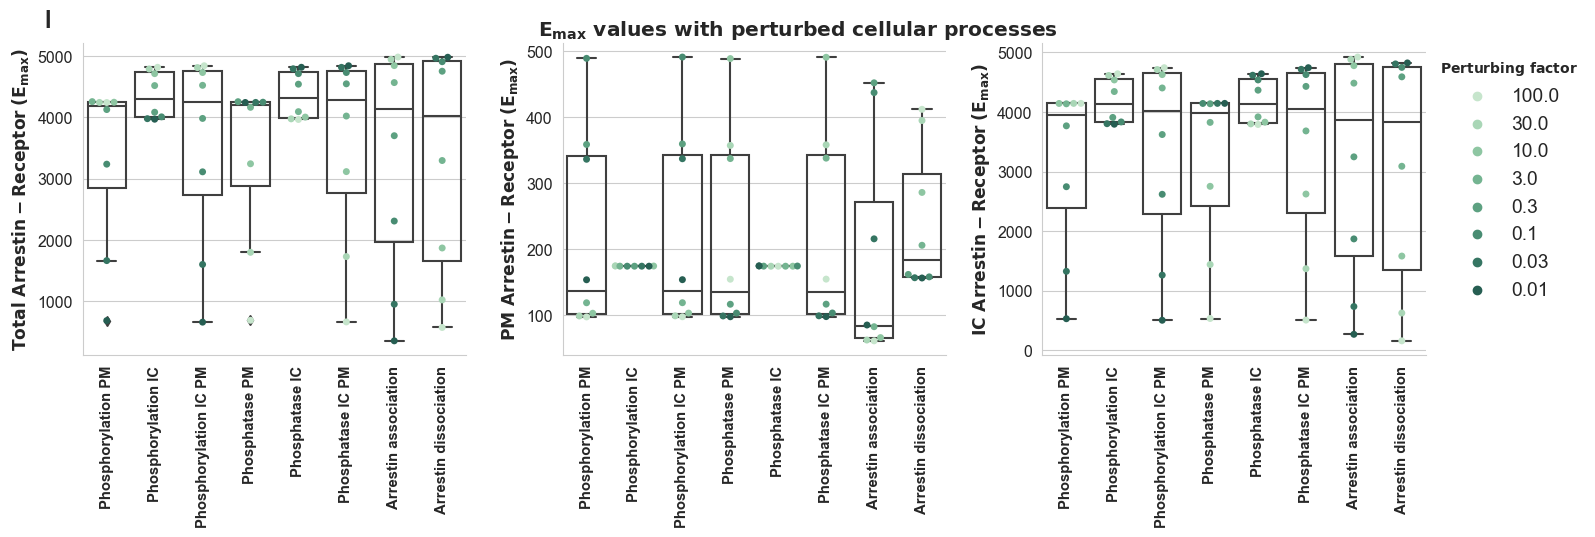

In [194]:
subplots_names=['L']
subplot_labels=['L']
molecules=['Total Arrestin-Receptor','PM Arrestin-Receptor','IC Arrestin-Receptor']

time_to_response=1200
factor_list=[100,30,10,3,0.3,0.1,0.03,0.01]

kon=0.3
koff_list=0.0003
intern_status='With_internalisation'
perturbed_processes=['Phosphorylation_PM','Phosphorylation_IC','Phosphorylation_IC_PM',
                    'Phosphatase_PM','Phosphatase_IC','Phosphatase_IC_PM',
                    'Arrestin_association','Arrestin_dissociation']

process_name='Koff_Kon_all'
color_palette_dict=mcolors.CSS4_COLORS
color_names=['tomato','peru','saddlebrown','darkorange','forestgreen','turquoise','royalblue','violet','black']

ligand_ccs=(10 ** np.arange(-6, 1.1, 1))

fig_width=40
fig_height=40

## Color palette for the coloring of the factor point markers
palette = sns.color_palette("ch:2.5,-.2,dark=.3",n_colors=len(factor_list))

## FOntsize=fig_width*fig_height/title_fontsize_ratio
figure_title='$\mathbf{E_{max}\ values\ with\ perturbed\ cellular\ processes}$'
figure_title_fontsize_nominator=110

subplot_label_fontsize_nominator=95
subplot_title_fontsize_nominator=110

subplot_axis_label_fontsize_nominator=130

subplot_y_axis_tick_label_fontsize_nominator=140
subplot_x_axis_tick_label_fontsize_nominator=150

subplot_legend_label_fontsize_nominator=115
subplot_legend_title_fontsize_nominator=105
legend_title='$\mathbf{Perturbing\ factor}$'
#legend_handles=['Low $K_{off}$','High $K_{off}$']

hm_annot_fontsize_nominator=80

hm_cbar_axis_fontsize_nominator=90
hm_cbar_legend_title_fontsize_nominator=55


## Create dataframe and savce it first, as it takes 2-3 minutes to compute
#plot_L_perturbations_df=create_perturbations_df(molecules,molecules_dict,kon,koff,intern_status,perturbed_processes,ligand_ccs,time_to_response,factor_list)
#plot_L_perturbations_df.to_csv('../data/temp_data_for_plotting/plot_L_perturbations_df'+str(high_koff)+'.csv')

## Read previously computed dataframe for plotting
plot_L_perturbations_df=pd.read_csv('../data/temp_data_for_plotting/plot_L_perturbations_df'+str(high_koff)+'.csv',index_col=0)




for subplot_name,subplot_label in zip(subplots_names,subplot_labels):
    g=create_perturbations_boxplot(plot_L_perturbations_df,molecules,molecules_dict,kon,koff,intern_status,perturbed_processes,ligand_ccs,\
                                                color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                                subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                                subplot_y_axis_tick_label_fontsize_nominator,subplot_x_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                                legend_title,subplot_legend_title_fontsize_nominator,legend_handles,time_to_response,ylim,\
                                                subplot_label,subplot_label_fontsize_nominator,marker_size_nominator,factor_list,figure_title,\
                                                figure_title_fontsize_nominator,palette)

    plt.show()
g.savefig('../data/temp_data_for_plotting/temporary_plot_L.png',dpi=300)



### Create and save boxplots with perturbations of different cellular processes heatmap  (__M__)

In [195]:
def create_perturbations_df_koff_ratio(molecules,molecules_dict,kon,koff_list,internalisation_status,perturbed_processes,ligand_ccs,time_to_response,\
                            factor_list):

    ## Create dataframe to collect the final results, both with internalisation and without internalisation
    intern_perturbations_df_colnames=molecules + ['Factor','Perturbed process','Internalisation']
    intern_perturbations_df=pd.DataFrame(columns=intern_perturbations_df_colnames)

    for intern_status in internalisation_status:
        
        ## Collect the perturbation results per Koff (high or low) to compute the ratio of the Receptor-Arrestin Emax values
        #  in the end
        perturbations_results_per_koff_dict={}
        for koff in koff_list:

            perturbations_results_per_koff_dict[koff]={}

            ## Adjust ligand concentrations to used Kon and Koff values +  convert it from uM/L to M/L (by subtracting 6 from hte logarithmic values of ligand ccs)
            ligands=np.log10(adjust_ligand_ccs(ligand_ccs,koff,kon)) - 6

            ## Create dataframe to collect perturbation results into for given koff, intern_status variables
            perturbations_df_colnames=molecules + ['Factor','Perturbed process','Internalisation']
            perturbations_df=pd.DataFrame(columns=perturbations_df_colnames)
            
            for process_name in perturbed_processes:
                ## Create directory path to load the data from
                dirname=os.path.join('../data/',intern_status,process_name,'')
                
                ## Create temporary dictionary collect the results of one perturbed process, which will get converted to DataFrame concatenated to perturbations_df
                process_results_dict={}
                
                for factor in factor_list:
                    process_results_dict[factor]={}
                    for molecule in molecules:
                                                        
                        ## Create list to save the Dose-Response concentrations of the molecule at the given timepoint for given Koff-kon value pair
                        DR_points=[]

                        ## Loop over the ligand concentrations, load the respective simulation data from the .csv file
                        for ligand in ligands:
                            fname=dirname+ '_'.join([process_name,str(factor),'koff',str(koff),'kon',str(kon),'ligand_cc',str(ligand)]) + '.csv'
                            col_nums=[int(x+1) for x in molecules_dict[molecule]]
                            col_nums.append(0)
                            mol_ccs_df=pd.read_csv(fname, index_col=0,usecols=col_nums)
                            response_at_time=np.sum(mol_ccs_df.loc[time_to_response,:])
                            DR_points.append(response_at_time)
                        
                        ## Append Emax value at given perturbation factor for given molecule, for given process and Koff/Kon
                        process_results_dict[factor][molecule]=DR_points[-1]
                
                ## Convert the results of perturbation of one process into a DataFrame
                process_df=pd.DataFrame.from_dict(process_results_dict)
                process_df=process_df.T
                process_df['Perturbed process']=process_name
                process_df['Internalisation']=intern_status
                process_df=process_df.rename_axis('Factor').reset_index()


                ## Concatenate the results from one process to the main result dataframe
                perturbations_df=pd.concat([perturbations_df,process_df],join="outer",ignore_index=True)
            
            ## Save perturbation effects of both low and high Koff value
            perturbations_results_per_koff_dict[koff]=perturbations_df
        
        ## To have a better overview, assign the collected results to variables and calculate the ratio 
        #  between High/Low Koff Arrestin-Receptor concentration results
        high_koff_df=perturbations_results_per_koff_dict[koff_list[-1]]
        low_koff_df=perturbations_results_per_koff_dict[koff_list[0]]
        
        perturbations_df_high_per_low_koff_ratio=low_koff_df.copy()
        perturbations_df_high_per_low_koff_ratio[molecule]=high_koff_df[molecule]/low_koff_df[molecule]

        ## Concatenate the Arrestin-Receptor ratio dataframes into a finel dataframe, where 'Internalisation' column indicates
        # internalisation status
        intern_perturbations_df=pd.concat([intern_perturbations_df,perturbations_df_high_per_low_koff_ratio],join="outer",ignore_index=True)    

    return intern_perturbations_df



def create_perturbations_boxplot_koff_ratio(perturbations_df,molecules,molecules_dict,kon,koff_list,intern_status,perturbed_processes,ligand_ccs,\
                                color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                subplot_y_axis_tick_label_fontsize_nominator,subplot_x_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                legend_title,subplot_legend_title_fontsize_nominator,legend_handles,time_to_response,ylim,\
                                subplot_label,subplot_label_fontsize_nominator,marker_size_nominator,factor_list,figure_title,\
                                figure_title_fontsize_nominator,palette):
    

    ## Get color palette 
    colors = [color_palette_dict.get(col) for col in color_names]
    plot_area=fig_width*fig_height

    ## Define which subplot we want to plot into from the original subplot_mosaic object
    #axis=ax[subplot_name]

    plot_df=perturbations_df.melt(id_vars=["Factor",'Perturbed process','Internalisation'],var_name="Molecule",value_name="Values")
    plot_df['Factor']=plot_df['Factor'].astype(str)
    plot_df['Perturbed process']=plot_df['Perturbed process'].str.replace('_',' ')


    ## Create a boxplot with no facecolor and overlay a swarmplot
    g=sns.FacetGrid(data=plot_df, col='Internalisation',height=4, aspect=1.7,sharey=True)
    g.map_dataframe(sns.swarmplot,x="Perturbed process", y="Values",hue='Factor',palette=palette)
    g.map_dataframe(sns.boxplot,x="Perturbed process", y="Values",boxprops={'facecolor':'None'})

    ## Customize legend
    g.add_legend(title=legend_title,title_fontsize=plot_area/subplot_legend_title_fontsize_nominator,\
                fontsize=plot_area/subplot_legend_label_fontsize_nominator,loc='upper right',bbox_to_anchor=(1, 0.92))

    #g.fig.suptitle(figure_title,fontsize=plot_area/figure_title_fontsize_nominator)
    
    g.axes.flat[0].text(-0.1, 1.05,subplot_label.lower(),weight='bold',\
                        size=plot_area/subplot_label_fontsize_nominator,transform=g.axes.flat[0].transAxes)
    
    ## Customize legend, plot title, axis labels 
    for g_ax, intern_status in zip(g.axes.flat,intern_status):
        for molecule in molecules:
        
            title_fontsize=plot_area/subplot_title_fontsize_nominator
            title_text=intern_status.replace('_','\ ')

            title_text="$\mathbf{{title}}$".replace('title',title_text)
            g_ax.set_title(title_text,fontsize=title_fontsize)

            ## If molecule is G_GTP, then do not change anything on that part of the string, as it is already TeX formulated
            if 'GTP' in molecule:
                y_axis_label=molecule + "\n"+ "$\mathbf{(E_{max})}$"
            
            ## TeX formulate Total Arrestin-Receptor string
            else:
                label_text=molecule.replace(' ','\ ')
                y_axis_label=r"$\mathbf{High/Low\ K_{off}}$" +'\n' +"$\mathbf{{title}}$".replace('title',label_text) + " "+ "$\mathbf{ratio}$"

            axis_label_fontsize=plot_area/subplot_axis_label_fontsize_nominator
            y_axis_tick_labelsize=plot_area/subplot_y_axis_tick_label_fontsize_nominator
            x_axis_tick_labelsize=plot_area/subplot_x_axis_tick_label_fontsize_nominator

            g_ax.set_ylabel(y_axis_label,fontweight="bold",fontsize=axis_label_fontsize)
            g_ax.tick_params(axis='y', labelsize=y_axis_tick_labelsize)
            g_ax.set_xlabel(None,fontweight="bold",fontsize=axis_label_fontsize)
            g_ax.set_xticklabels(g_ax.get_xticklabels(), rotation=90, weight='bold', size=x_axis_tick_labelsize)

    return(g)    


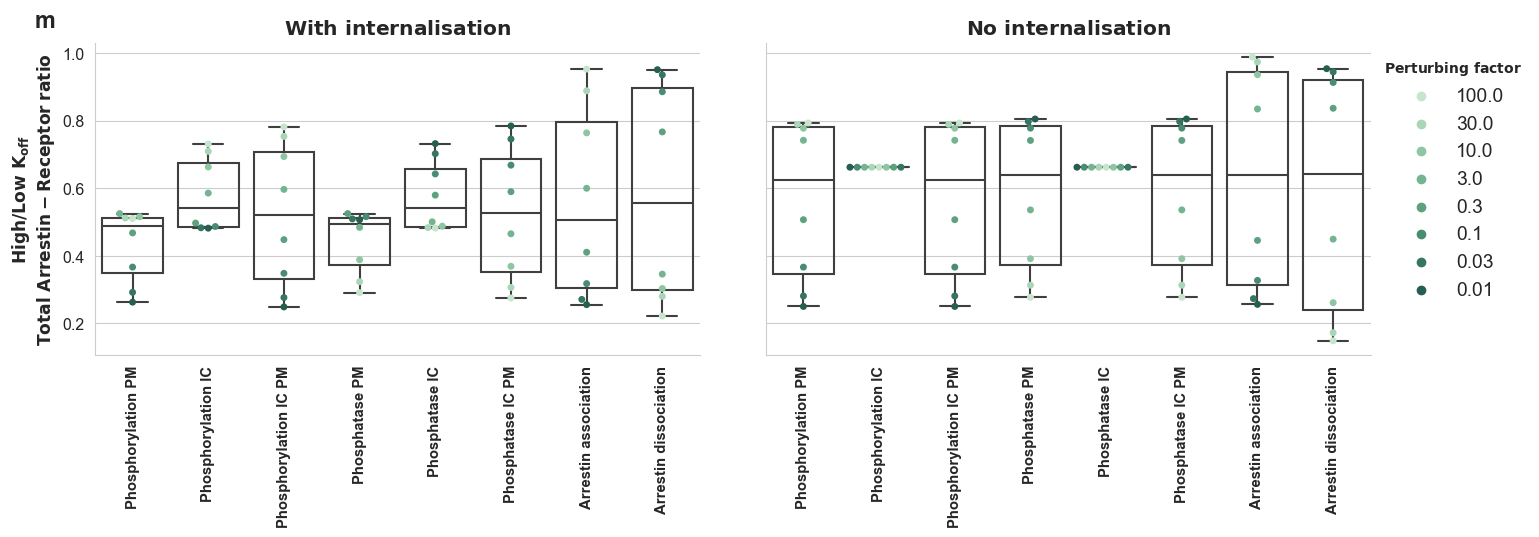

In [196]:
subplots_names=['M']
subplot_labels=['M']
molecules=['Total Arrestin-Receptor']

time_to_response=1200
factor_list=[100,30,10,3,0.3,0.1,0.03,0.01]

kon=0.3
## Always initialise Koff list with ascending values!
koff_list=[0.0003,high_koff]

internalisation_status=['With_internalisation','No_internalisation']
perturbed_processes=['Phosphorylation_PM','Phosphorylation_IC','Phosphorylation_IC_PM',
                    'Phosphatase_PM','Phosphatase_IC','Phosphatase_IC_PM',
                    'Arrestin_association','Arrestin_dissociation']

process_name='Koff_Kon_all'
color_palette_dict=mcolors.CSS4_COLORS
color_names=['tomato','peru','saddlebrown','darkorange','forestgreen','turquoise','royalblue','violet','black']

ligand_ccs=(10 ** np.arange(-6, 1.1, 1))

fig_width=40
fig_height=40

## Color palette for the coloring of the factor point markers
palette = sns.color_palette("ch:2.5,-.2,dark=.3",n_colors=len(factor_list))

## FOntsize=fig_width*fig_height/title_fontsize_ratio
figure_title='$\mathbf{E_{max}\ values\ with\ perturbed\ cellular\ processes}$'
figure_title_fontsize_nominator=110

subplot_label_fontsize_nominator=95
subplot_title_fontsize_nominator=110

subplot_axis_label_fontsize_nominator=130

subplot_y_axis_tick_label_fontsize_nominator=140
subplot_x_axis_tick_label_fontsize_nominator=150

subplot_legend_label_fontsize_nominator=115
subplot_legend_title_fontsize_nominator=105
legend_title='$\mathbf{Perturbing\ factor}$'
#legend_handles=['Low $K_{off}$','High $K_{off}$']

hm_annot_fontsize_nominator=80

hm_cbar_axis_fontsize_nominator=90
hm_cbar_legend_title_fontsize_nominator=55


## Create dataframe and savce it first, as it takes 2-3 minutes to compute
#plot_M_perturbations_df=create_perturbations_df_koff_ratio(molecules,molecules_dict,kon,koff_list,internalisation_status,perturbed_processes,ligand_ccs,time_to_response,factor_list)
#plot_M_perturbations_df.to_csv('../data/temp_data_for_plotting/plot_M_perturbations_df'+str(high_koff)+'.csv')

## Read previously computed dataframe for plotting
plot_M_perturbations_df=pd.read_csv('../data/temp_data_for_plotting/plot_M_perturbations_df'+str(high_koff)+'.csv',index_col=0)



for subplot_name,subplot_label in zip(subplots_names,subplot_labels):
    g=create_perturbations_boxplot_koff_ratio(plot_M_perturbations_df,molecules,molecules_dict,kon,koff_list,internalisation_status,perturbed_processes,ligand_ccs,\
                                                color_palette_dict,color_names,ax,subplot_name,fig_width,fig_height,\
                                                subplot_title_fontsize_nominator,subplot_axis_label_fontsize_nominator,\
                                                subplot_y_axis_tick_label_fontsize_nominator,subplot_x_axis_tick_label_fontsize_nominator,subplot_legend_label_fontsize_nominator,\
                                                legend_title,subplot_legend_title_fontsize_nominator,legend_handles,time_to_response,ylim,\
                                                subplot_label,subplot_label_fontsize_nominator,marker_size_nominator,factor_list,figure_title,\
                                                figure_title_fontsize_nominator,palette)

    plt.show()
g.savefig('../data/temp_data_for_plotting/temporary_plot_M.png',dpi=300)


### Concatenate the subplots togother, as the subplots A-K are in one figure created by subplot_mosaic function, but the last two plots are in FacetGrod objects, and as they are inplicitly creating their own Figure object, the easiest method was to save the subplots as .png files and then concatenate them into one .png or .pdf

In [197]:

subplots_B_K=Image.open('../data/temp_data_for_plotting/temporary_plot_B_K.png')
subplots_L=Image.open('../data/temp_data_for_plotting/temporary_plot_L.png')
subplots_M=Image.open('../data/temp_data_for_plotting/temporary_plot_M.png')

subplots=[subplots_B_K,subplots_L,subplots_M]
resized_subplots=[subplots_B_K]
for im in subplots[1:]:
    scale_ratio=subplots_B_K.size[0]/im.size[0]
    resized_subplot=im.resize((subplots_B_K.size[0],int(im.size[1]*scale_ratio)))
    resized_subplots.append(resized_subplot)

widths, heights = zip(*(i.size for i in resized_subplots))

total_width = max(widths)
max_height = sum(heights)

new_im = Image.new('RGB', (total_width, max_height+1000),(255,255,255))


y_offsets=[im.size[1]+500 for im in resized_subplots]
y_offsets[0] = 0
y_offset=0
for im in resized_subplots:
    print(y_offset)
    new_im.paste(im, (0,y_offset))
    y_offset += im.size[1]+85
  
new_im.show()
new_im.save('../data/temp_data_for_plotting/final_plot_'+str(high_koff)+'.png')


/Users/daniel.garger/anaconda3/envs/pytorch/lib/python3.10/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (95079976 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


0
9791
13176
